# IF3170 Artificial Intelligence | EDA Assignement

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks if needed.

Group Number: 24

Group Members:
- Bagas Sambega Rosyada (13522071)
- Raden Francisco Trianto B. (13522091)

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import seaborn as sns

# Function to display markdown
def print_markdown(md_text):
    display(Markdown(md_text))

## Import Dataset

In [3]:
df_basic: pd.DataFrame = pd.read_csv('https://drive.google.com/uc?id=13tF-GIYu16jW4nwtpyr3wdnZ9dxSO2Bw')
df_content: pd.DataFrame = pd.read_csv('https://drive.google.com/uc?id=149SCgTHeTAH5JJK1mhCMFS0zcxb9EQTB')
df_time: pd.DataFrame = pd.read_csv('https://drive.google.com/uc?id=142EMJgpcjkGpCkH89PbCAQ_kfQQNB4Di')
df_flow: pd.DataFrame = pd.read_csv('https://drive.google.com/uc?id=148NT-iSRb5gdyUAgj5HRA474uKWTAGF2')
df_additional: pd.DataFrame = pd.read_csv('https://drive.google.com/uc?id=140SZNWJOVSKFNIFy0z-Io3JTYvBzdJkn')
df_label: pd.DataFrame = pd.read_csv('https://drive.google.com/uc?id=143J6K8y7kNek_JsSJK6nbmk2OX7S3oHd')

df_basic.set_index('id', inplace=True)
df_content.set_index('id', inplace=True)
df_time.set_index('id', inplace=True)
df_flow.set_index('id', inplace=True)
df_additional.set_index('id', inplace=True)
df_label.set_index('id', inplace=True)

df = df_basic \
    .join(df_content, how='inner') \
    .join(df_time, how='inner') \
    .join(df_flow, how='inner') \
    .join(df_additional, how='inner') \
    .join(df_label, how='inner')

df.reset_index(inplace=True)

print(df.head())

   id state       dur  sbytes  dbytes  sttl  dttl  sloss  dloss service  ...  \
0   1   FIN  0.121478     258     172   252   254      0      0       -  ...   
1   2   FIN  0.649902     734   42014    62   252      2     17       -  ...   
2   3   FIN  1.623129     364   13186    62   252      1      6       -  ...   
3   4   FIN  1.681642     628     770    62   252      1      3     ftp  ...   
4   5   FIN  0.449454     534     268   254   252      2      1       -  ...   

   ct_ftp_cmd  ct_srv_src  ct_srv_dst  ct_dst_ltm  ct_src_ltm  \
0           0           1           1           1           1   
1           0          43           6           1           1   
2           0           7           6           2           2   
3           1           1           1           2           2   
4           0          43          39           2           2   

   ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  attack_cat  label  
0                 1                 1               1

# 1. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

## A. Data Understanding
The objective of this section is for participants to understand the quality of the provided data. This includes:

1. Data Size
2. Statistics of Each Feature
3. Outliers
4. Correlation
5. Distribution

### Step 1

Find the following:

1. The size of the data (instances and features).
2. The data types of each feature.
3. The number of unique values for categorical features.
4. The minimum, maximum, mean, median, and standard deviation values for non-categorical features.
5. Explain the significance of gathering the first four pieces of information.

#### 1. The Size of the Data (Instances and Features)

In [4]:
print(f"Number of instances: {df.shape[0]} | Number of features: {df.shape[1] - 1}") # Except ID

Number of instances: 175341 | Number of features: 43


#### 2. The Data Types of Each Feature

In [5]:
for col in df:
    print(f"Column {col}: {df[col].dtype}")

Column id: int64
Column state: object
Column dur: float64
Column sbytes: int64
Column dbytes: int64
Column sttl: int64
Column dttl: int64
Column sloss: int64
Column dloss: int64
Column service: object
Column sload: float64
Column dload: float64
Column spkts: int64
Column dpkts: int64
Column swin: int64
Column dwin: int64
Column stcpb: int64
Column dtcpb: int64
Column smean: int64
Column dmean: int64
Column trans_depth: int64
Column response_body_len: int64
Column sjit: float64
Column djit: float64
Column sinpkt: float64
Column dinpkt: float64
Column tcprtt: float64
Column synack: float64
Column ackdat: float64
Column proto: object
Column is_sm_ips_ports: int64
Column ct_state_ttl: int64
Column ct_flw_http_mthd: int64
Column is_ftp_login: int64
Column ct_ftp_cmd: int64
Column ct_srv_src: int64
Column ct_srv_dst: int64
Column ct_dst_ltm: int64
Column ct_src_ltm: int64
Column ct_src_dport_ltm: int64
Column ct_dst_sport_ltm: int64
Column ct_dst_src_ltm: int64
Column attack_cat: object
Colu

##### Setup categorical column for each dataframes

Categorical column consist of columns that have categorical values. The binary values (true and false) also included as categorical values. The rest of the columns are considered numerical/non-categorical values (except for ID column). However there are several numerical column that having little unique values (such as ct_state_ttl, ct_flw_http_mthd, and ct_ftp_cmd) that considered as categorical values, since they're mapped into categorical column proto or state.

In [6]:
# Setup categorical column for each dataframes
categorical_col: list[str] = ['proto', 'state', 'service', 'attack_cat', 'label', 'is_sm_ips_ports', 'is_ftp_login', 'ct_state_ttl', 'ct_flw_http_mthd', 'ct_ftp_cmd'] 

non_categorical_col: list[str] = [col for col in df.columns if col not in categorical_col and col != 'id']   

print("Categorical Columns:", categorical_col)
print("Non-Categorical Columns:", non_categorical_col)

Categorical Columns: ['proto', 'state', 'service', 'attack_cat', 'label', 'is_sm_ips_ports', 'is_ftp_login', 'ct_state_ttl', 'ct_flw_http_mthd', 'ct_ftp_cmd']
Non-Categorical Columns: ['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']


#### 3. The Number of Unique Values for Categorical Features

In [7]:
for col in categorical_col:
    print(f"Column {col}: {df[col].nunique()}")


Column proto: 133
Column state: 9
Column service: 13
Column attack_cat: 10
Column label: 2
Column is_sm_ips_ports: 2
Column is_ftp_login: 4
Column ct_state_ttl: 5
Column ct_flw_http_mthd: 11
Column ct_ftp_cmd: 4


#### 4. The Minimum, Maximum, Mean, Median, and Standard Deviation Values for Non-Categorical Features

In [8]:
df[non_categorical_col].describe()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,...,tcprtt,synack,ackdat,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
count,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,1.359389,8.844844e+03,1.492892e+04,179.546997,79.609567,4.953000,6.948010,7.345403e+07,6.712056e+05,20.298664,...,0.041396,0.021020,0.020375,9.306437,9.100758,6.193936,6.955789,5.383538,4.206255,8.729881
std,6.480249,1.747656e+05,1.436542e+05,102.940011,110.506863,66.005059,52.732999,1.883574e+08,2.421312e+06,136.887597,...,0.079354,0.043400,0.040506,10.704331,10.756952,8.052476,8.321493,8.047104,5.783585,10.956186
min,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000008,1.140000e+02,0.000000e+00,62.000000,0.000000,0.000000,0.000000,1.305334e+04,0.000000e+00,2.000000,...,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,0.001582,4.300000e+02,1.640000e+02,254.000000,29.000000,0.000000,0.000000,8.796748e+05,1.447023e+03,2.000000,...,0.000000,0.000000,0.000000,5.000000,4.000000,2.000000,3.000000,1.000000,1.000000,3.000000
75%,0.668069,1.418000e+03,1.102000e+03,254.000000,252.000000,3.000000,2.000000,8.888889e+07,2.784487e+04,12.000000,...,0.065481,0.023268,0.038906,12.000000,12.000000,7.000000,9.000000,5.000000,3.000000,12.000000
max,59.999989,1.296523e+07,1.465555e+07,255.000000,254.000000,4803.000000,5484.000000,5.988000e+09,2.242273e+07,9616.000000,...,2.518893,2.100352,1.520884,63.000000,62.000000,51.000000,60.000000,51.000000,46.000000,65.000000


#### 5. The Significance of Gathering the First Four Pieces of Information
There are 4 steps taken already for the data. The first step is knowing the size/dimension of data. We need to know how much columns and rows actually the datasets are. This will give us knowledge about scope of the dataset and how to process the data efficiently.

The second step is knowing the datatypes for each features in each dataframe. By doing so, we know how each column should be analyzed and processed. We also know which column is categorical and non-categorical type

The third step is counting how many unique values for column that holds categorical values. Counting the unique values in categorical features helps understand their variability and role in the dataset

The fourth step is finding statistical data such as minimum, maximum values, deviation for non-categorical column. These statistical measures help understand the distribution, scale, and spread of numerical data.

### Step 2

Find the following:

1. Missing values for each feature.
2. Outliers for each feature (use the methods you are familiar with).
3. Why is it necessary to identify missing values and outliers?

#### 1. Missing Values for Each Feature

In [9]:
print_markdown("#### Missing Values")
print(df.isnull().sum())

#### Missing Values

id                   0
state                0
dur                  0
sbytes               0
dbytes               0
sttl                 0
dttl                 0
sloss                0
dloss                0
service              0
sload                0
dload                0
spkts                0
dpkts                0
swin                 0
dwin                 0
stcpb                0
dtcpb                0
smean                0
dmean                0
trans_depth          0
response_body_len    0
sjit                 0
djit                 0
sinpkt               0
dinpkt               0
tcprtt               0
synack               0
ackdat               0
proto                0
is_sm_ips_ports      0
ct_state_ttl         0
ct_flw_http_mthd     0
is_ftp_login         0
ct_ftp_cmd           0
ct_srv_src           0
ct_srv_dst           0
ct_dst_ltm           0
ct_src_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
attack_cat           0
label      

#### 2. Outliers for Each Feature

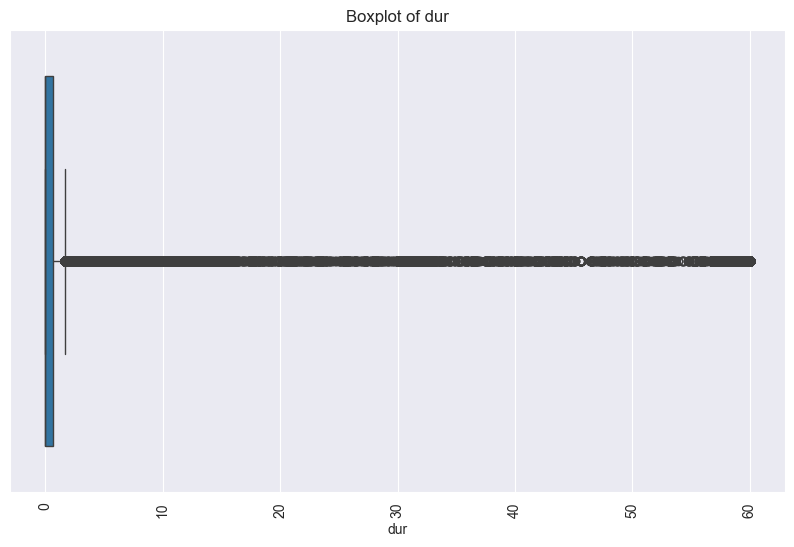

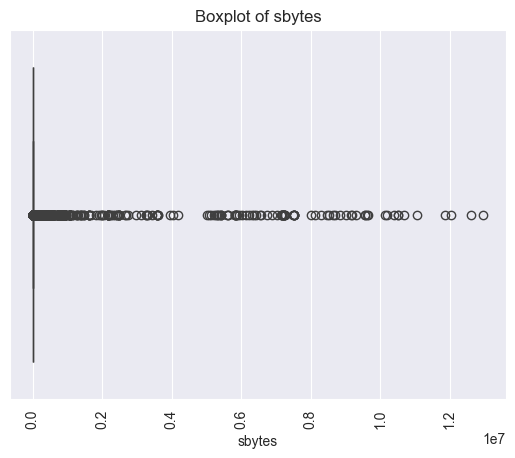

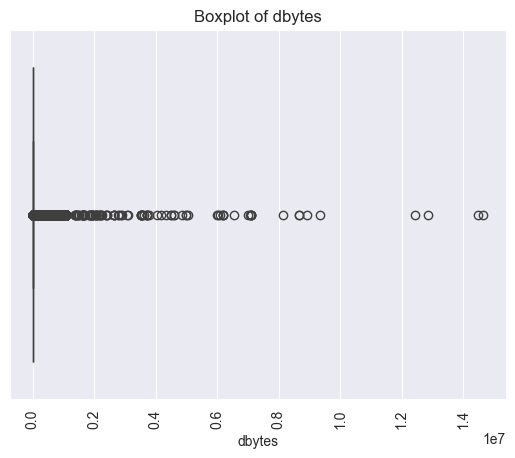

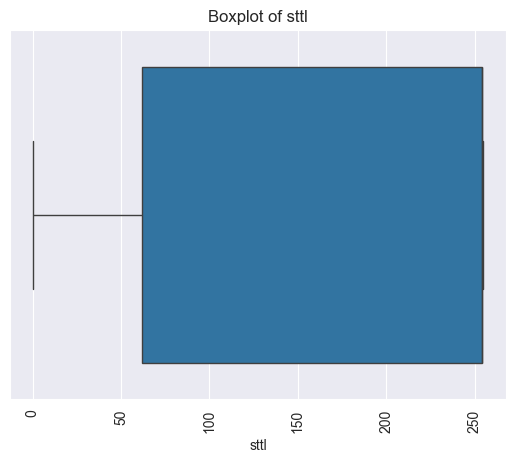

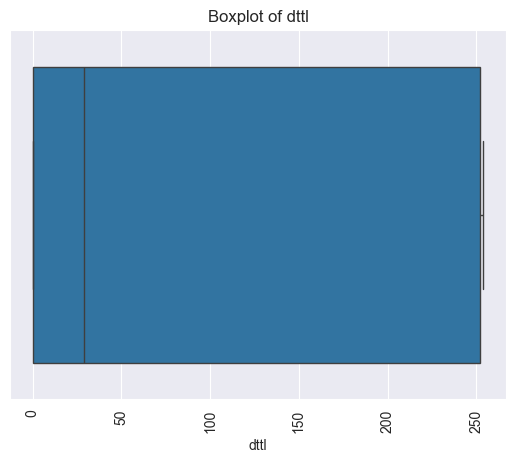

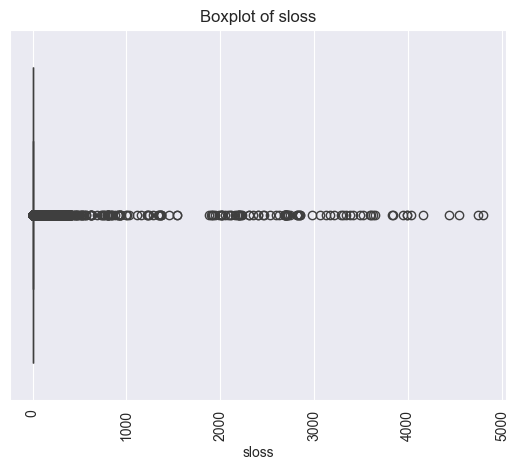

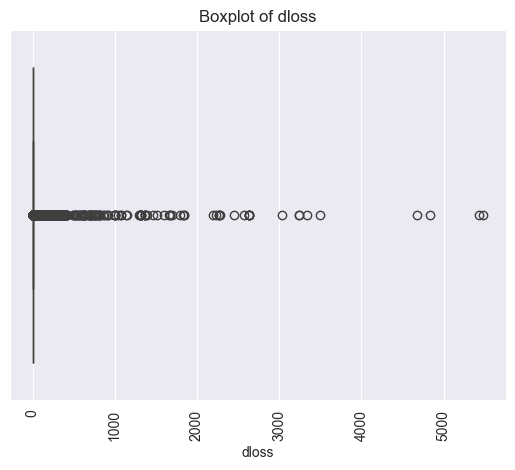

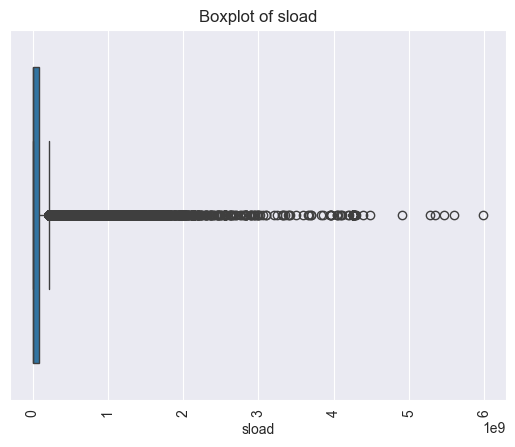

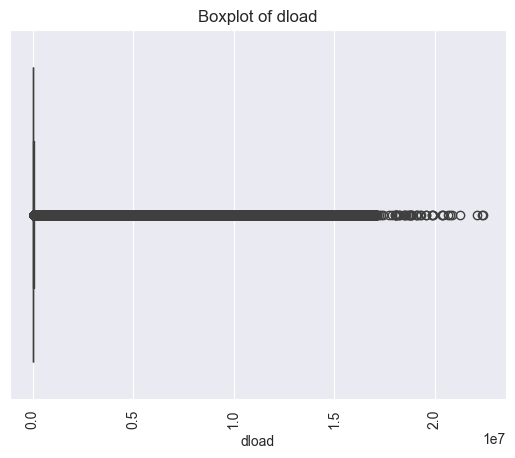

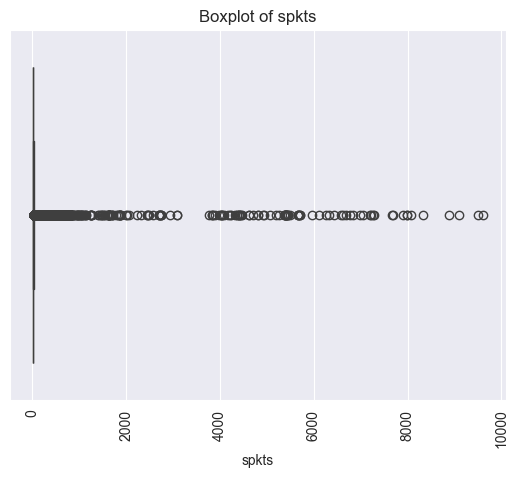

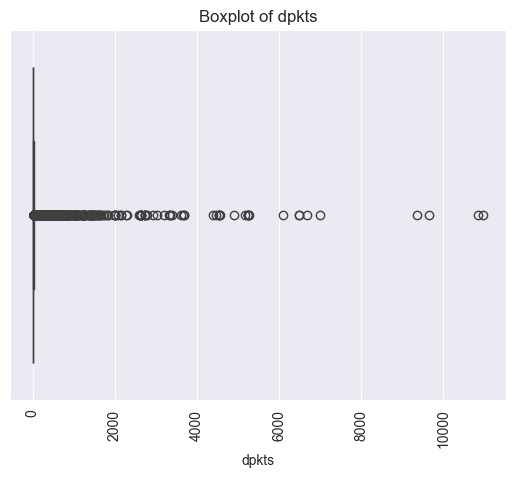

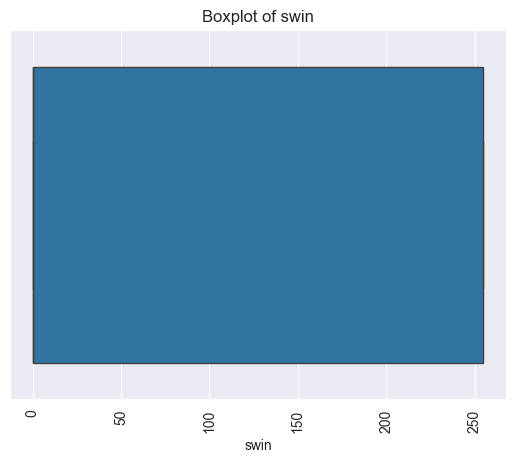

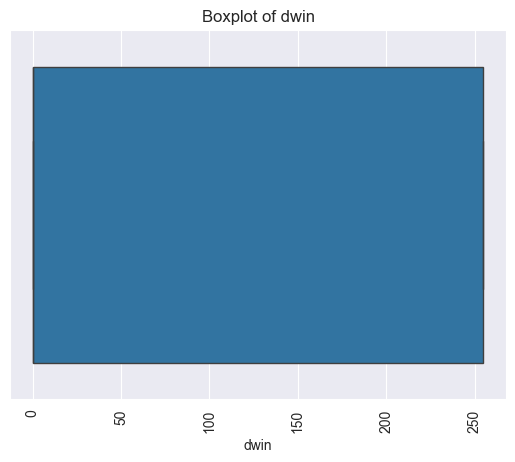

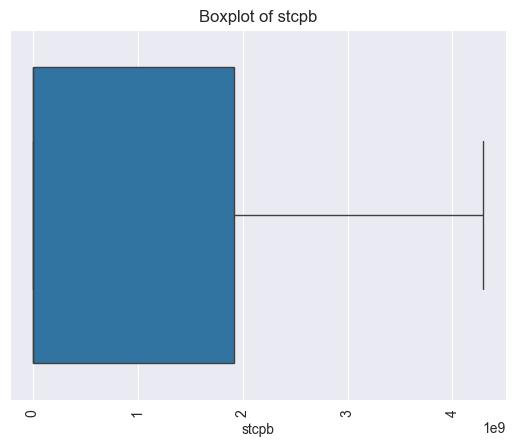

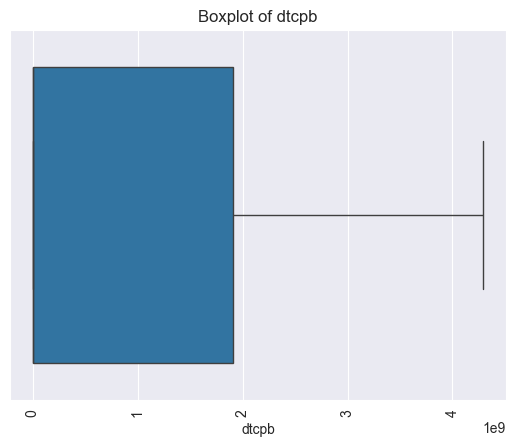

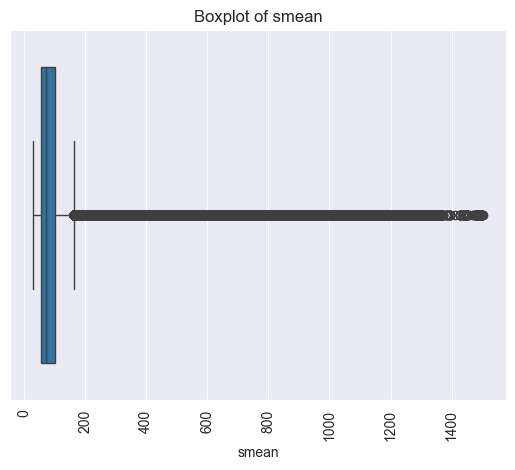

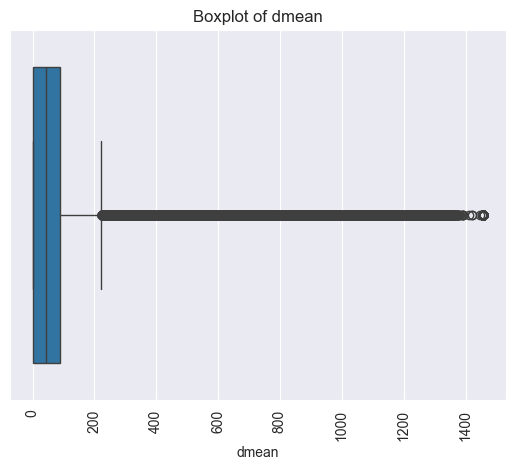

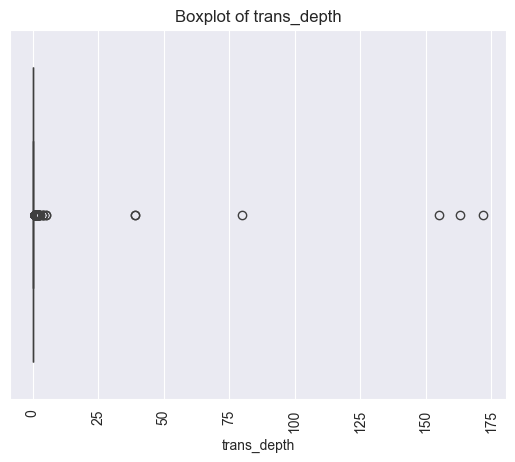

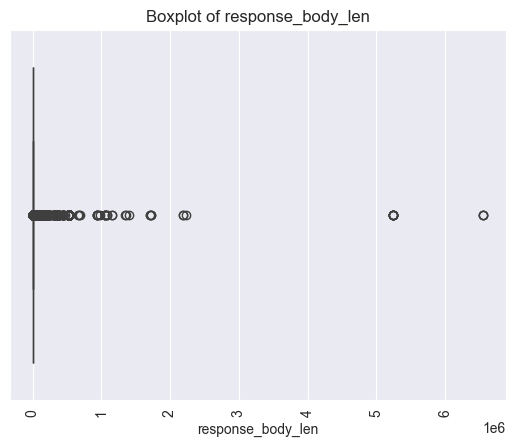

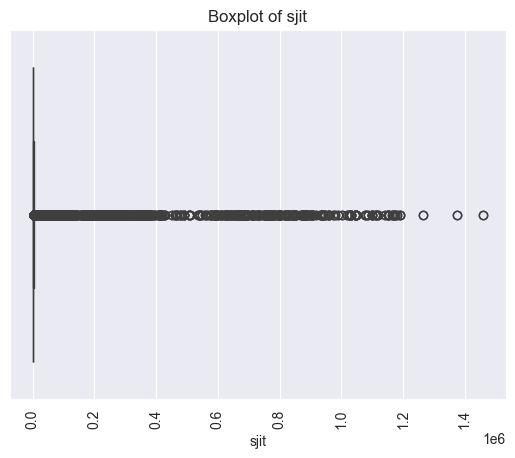

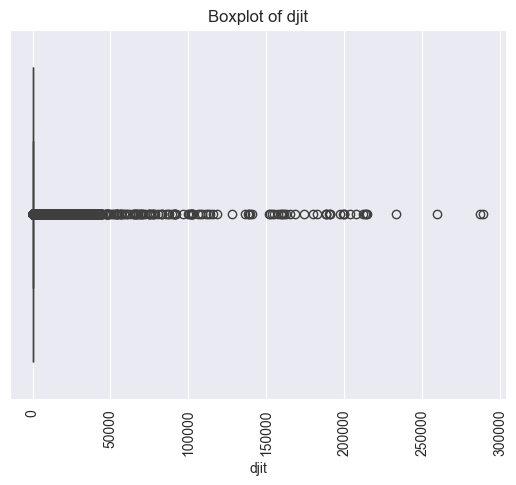

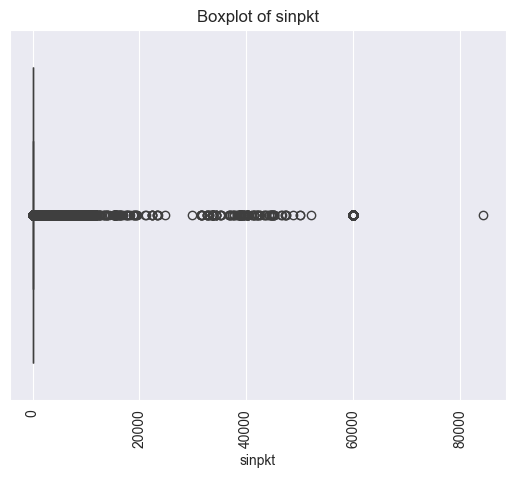

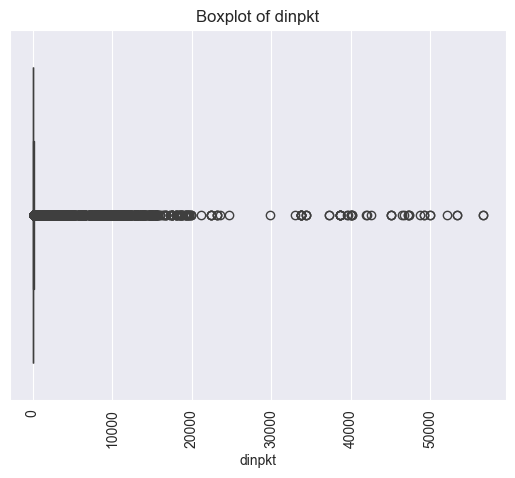

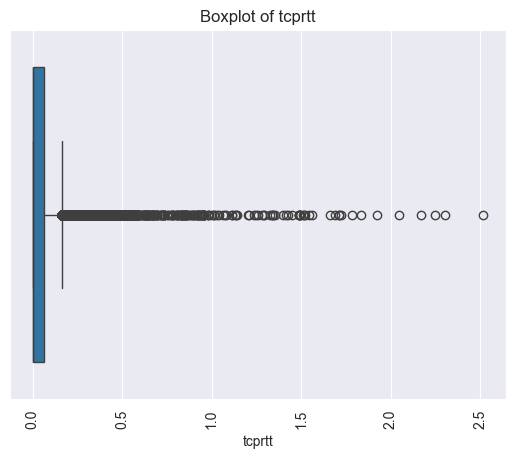

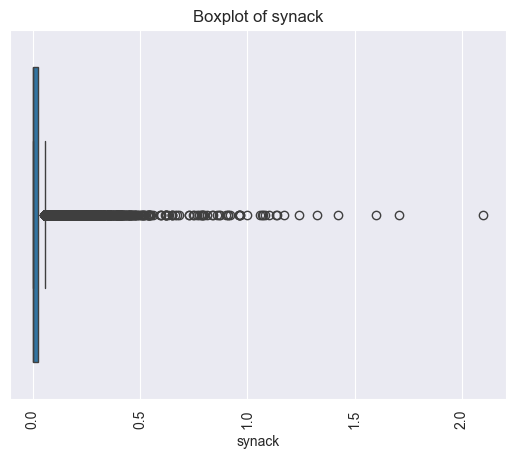

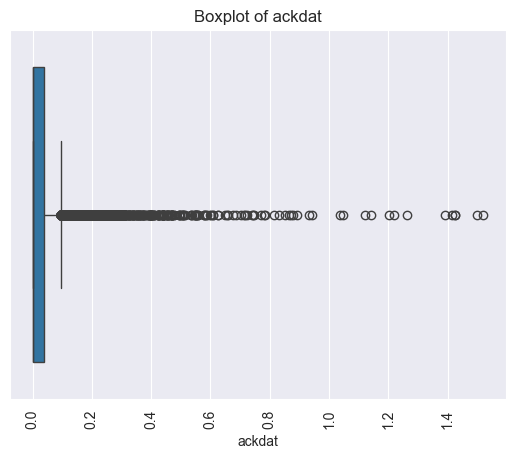

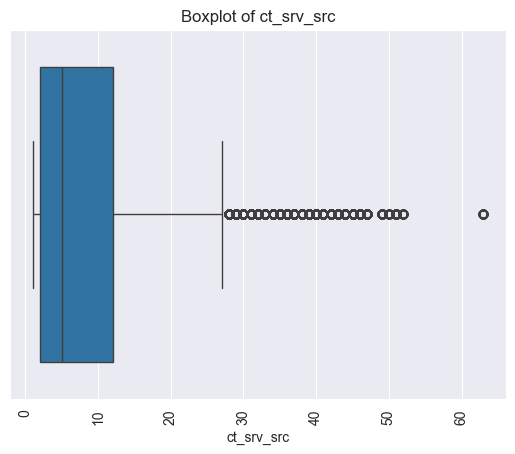

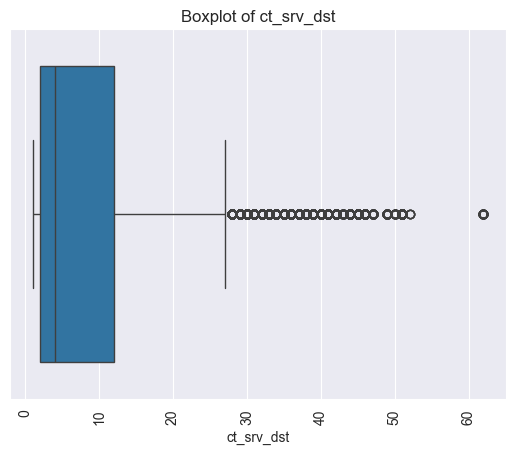

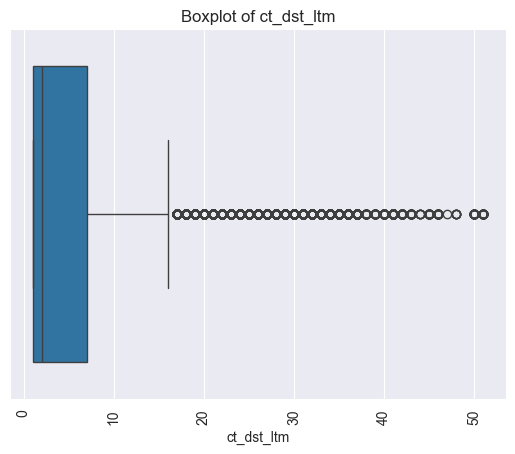

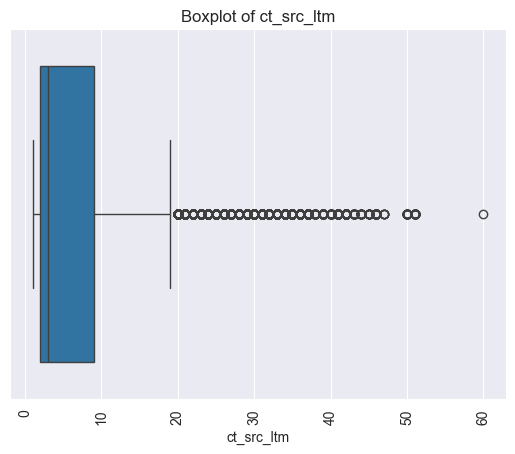

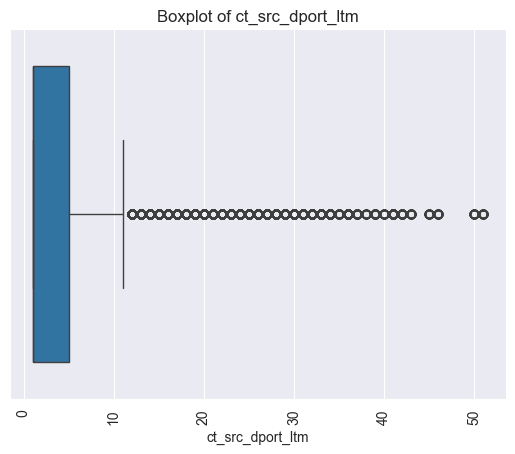

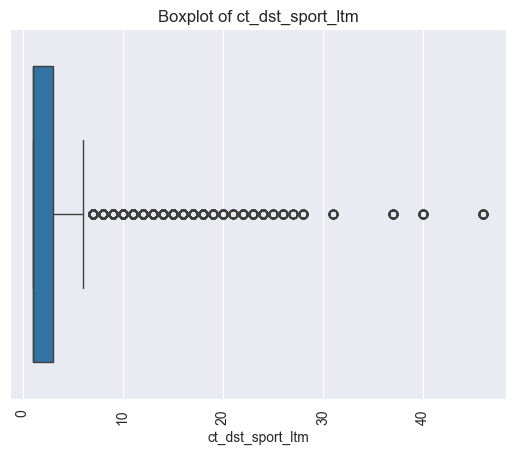

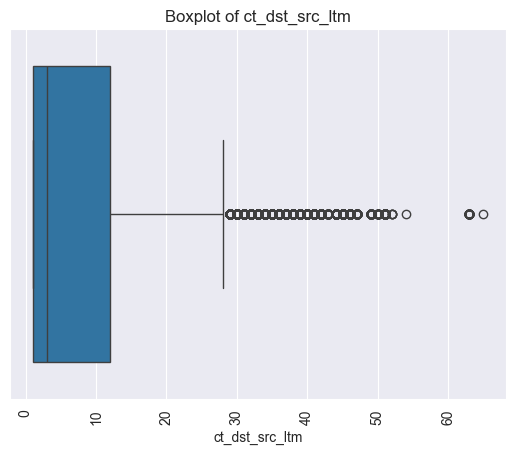

In [10]:
df_numeric = df[non_categorical_col]

plt.figure(figsize=(10, 6))
for col in df_numeric.columns:
    sns.boxplot(x=df_numeric[col])
    plt.xticks(rotation=90)
    plt.title(f"Boxplot of {col}")
    plt.show()

##### Explanation of Outliers

From the plot, we can see that there are several columns that have outliers. Outliers are data points that are significantly different from the rest of the data. The outliers from each features vary in the dataset. Several columns have great amount of outliers such as ct_dst_src_ltm and ct_dst_ltm, while other column such as dwin doesn't even have outliers. 

#### 3. Why is it Necessary to Identify Missing Values and Outliers?

Missing values and outliers can significantly affect the performance of processing datas and making miscalculation. Missing values can lead to biased or wrong data processing result, while outliers can skew the results and reduce the accuracy of the data processing and machine learning models. Missing values indicate there's no information about the data, and outliers indicate bad data whether the data is wrong or the experiment is wrong. 

Since the data is used for training a machine learning model, missing values and outliers could caused misconfiguration and miscalculations due to bad data. Therefore, it is necessary to identify missing values and outliers to ensure the data quality and the model performance.

### Step 3

Find the following:

1. Correlations between features.
2. Visualize the distribution of each feature (categorical and continuous).
3. Visualize the correlation between features and the target variable.
4. Explain the significance of understanding feature distributions and correlations.

#### Correlations between Features

Correlation between features only for non-categorical columns


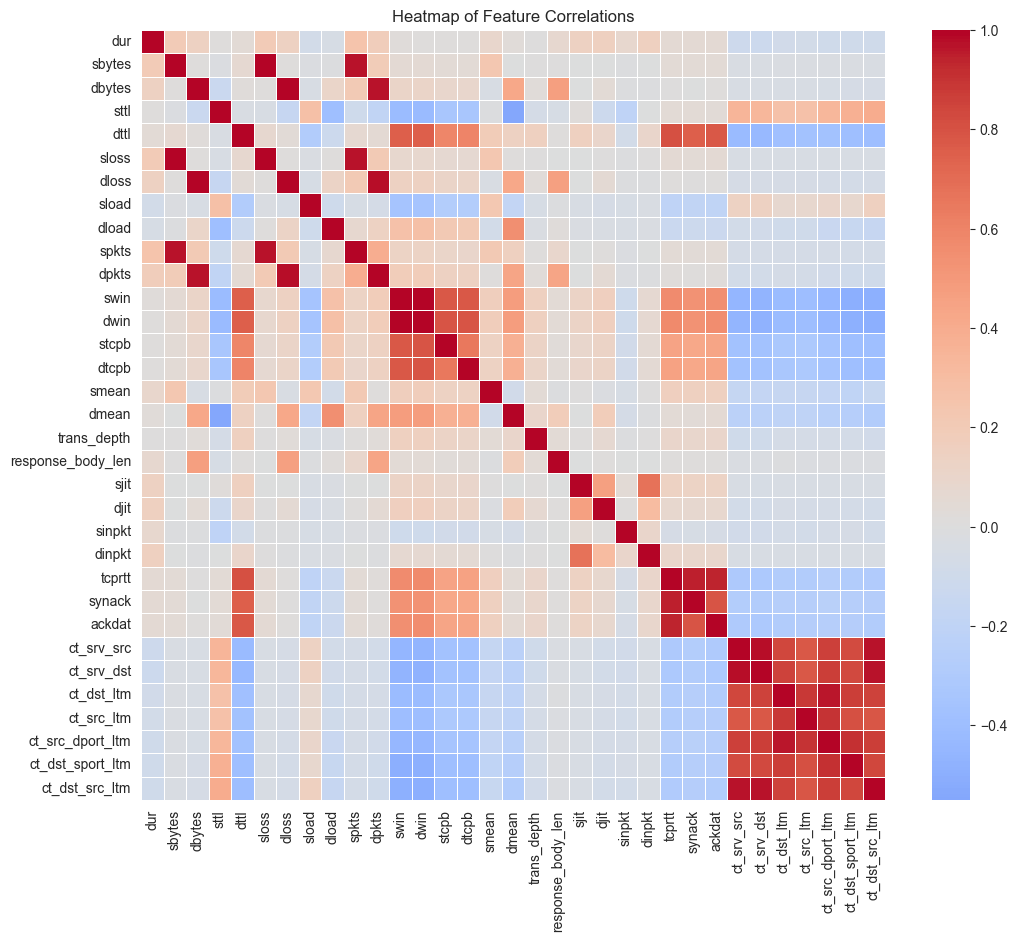

In [11]:
print_markdown("#### Correlations between Features")
print("Correlation between features only for non-categorical columns")
correlation = df_numeric.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation, annot=False, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")

plt.title("Heatmap of Feature Correlations")
plt.show()

In [12]:
print_markdown("#### Visualize the Distribution of Each Feature (Categorical and Continuous)")



#### Visualize the Distribution of Each Feature (Categorical and Continuous)

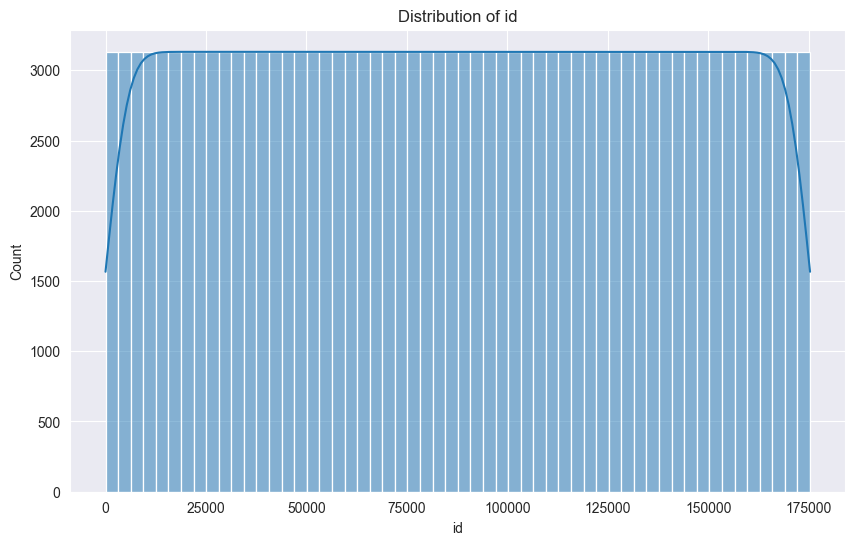

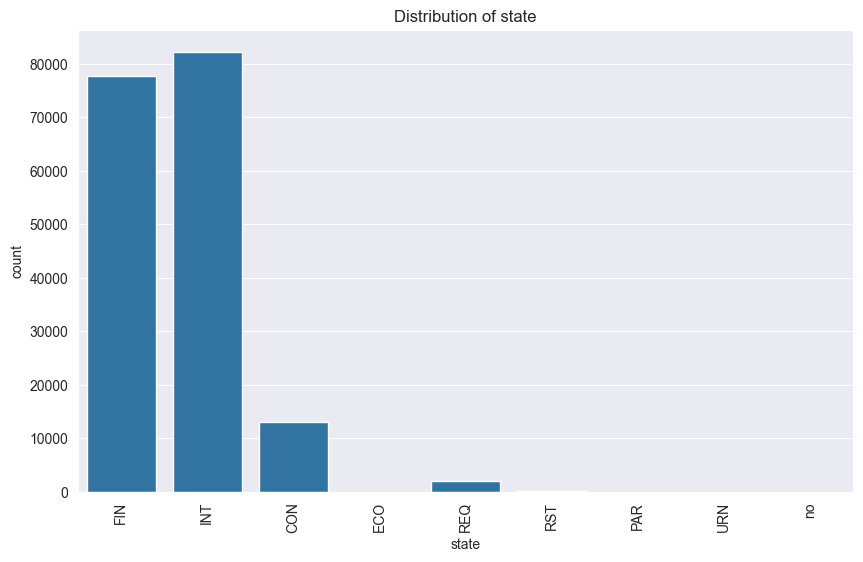

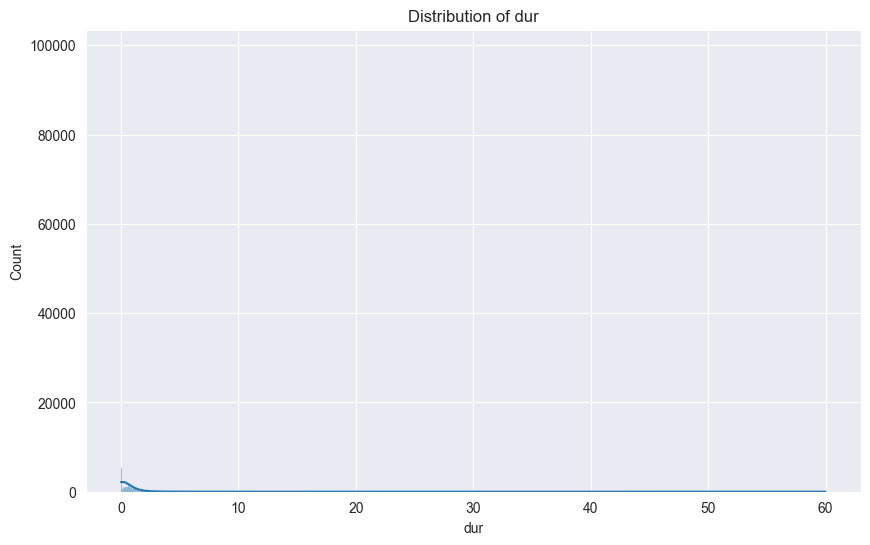

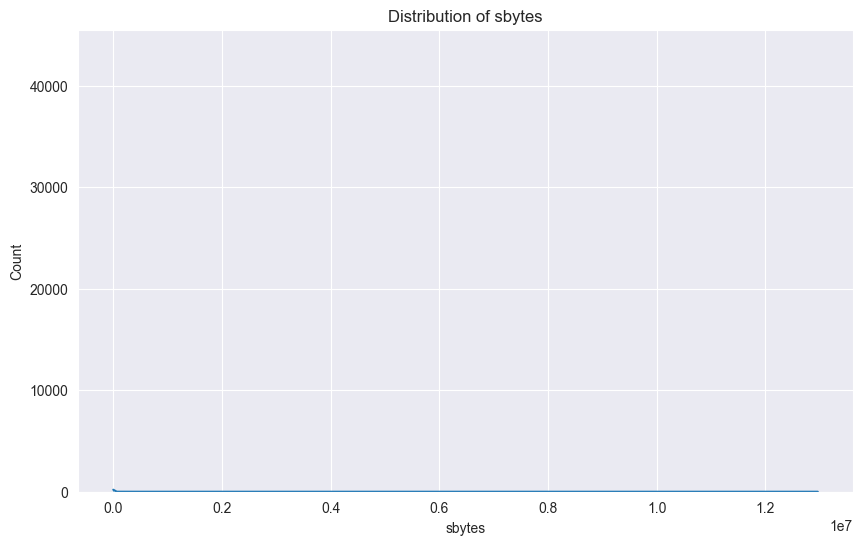

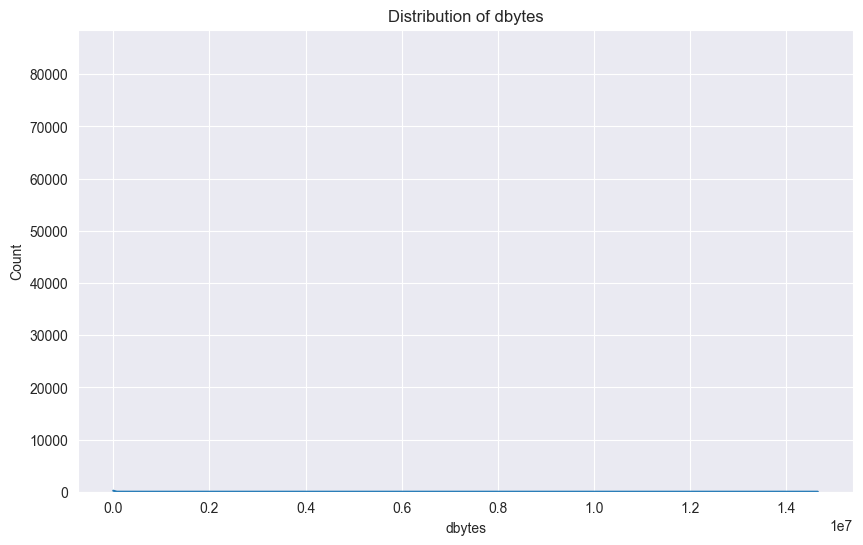

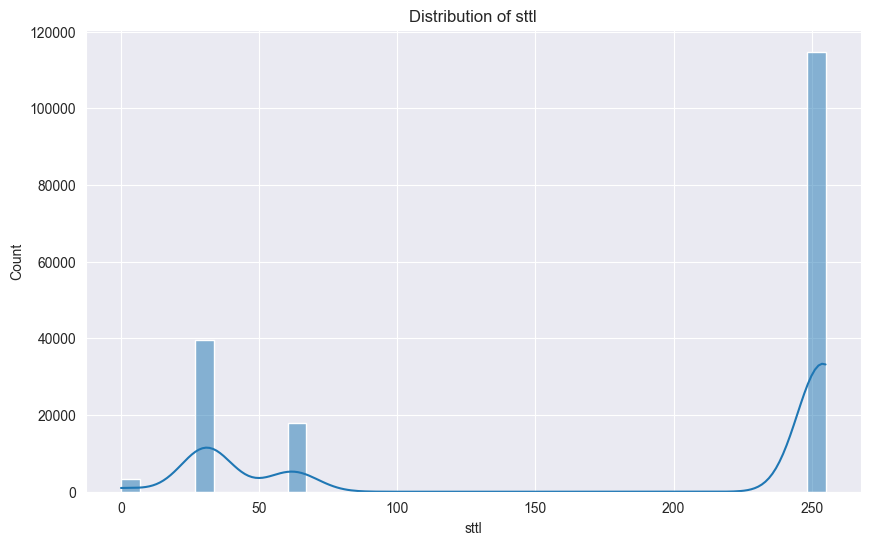

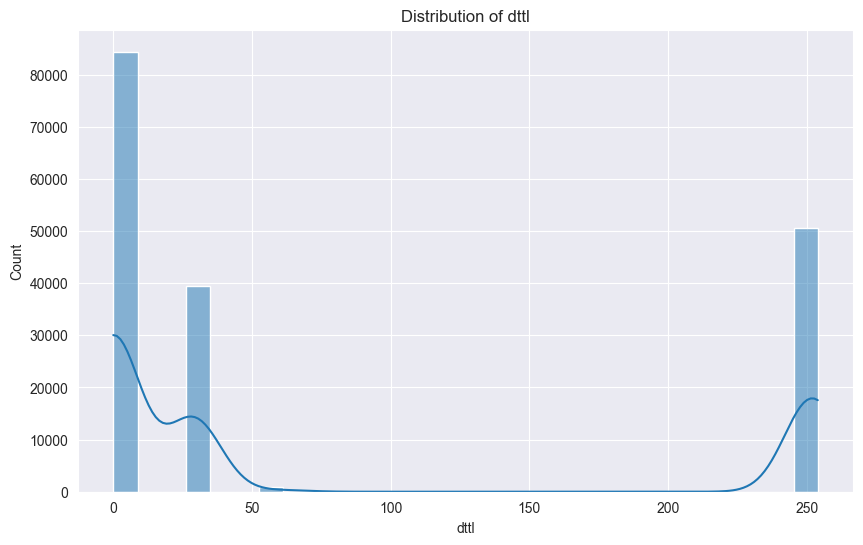

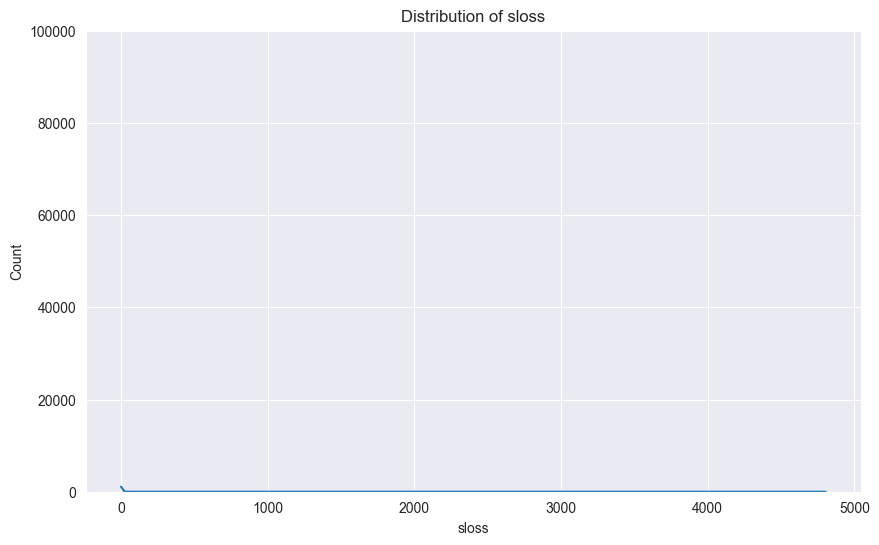

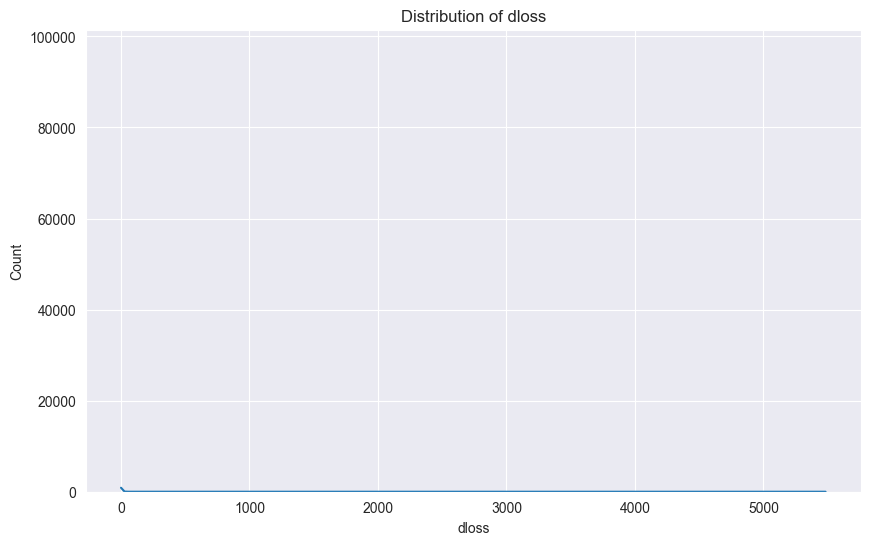

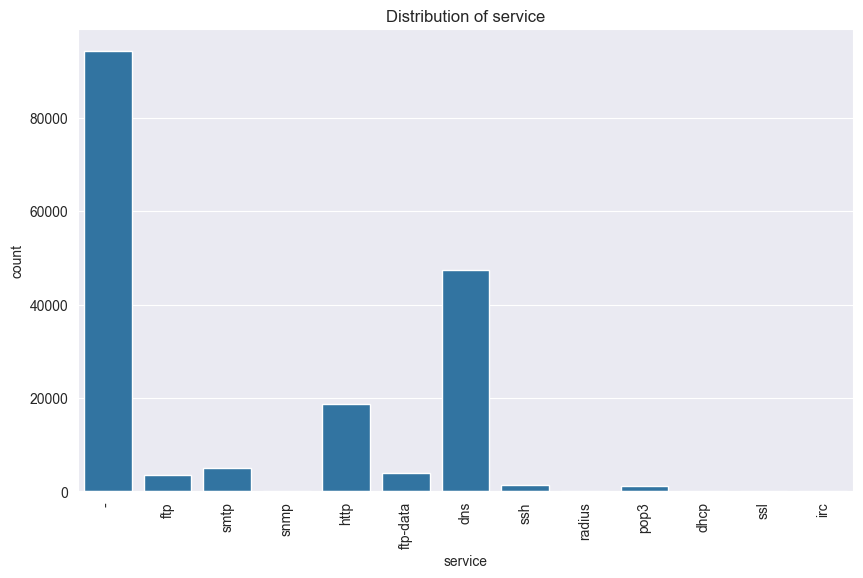

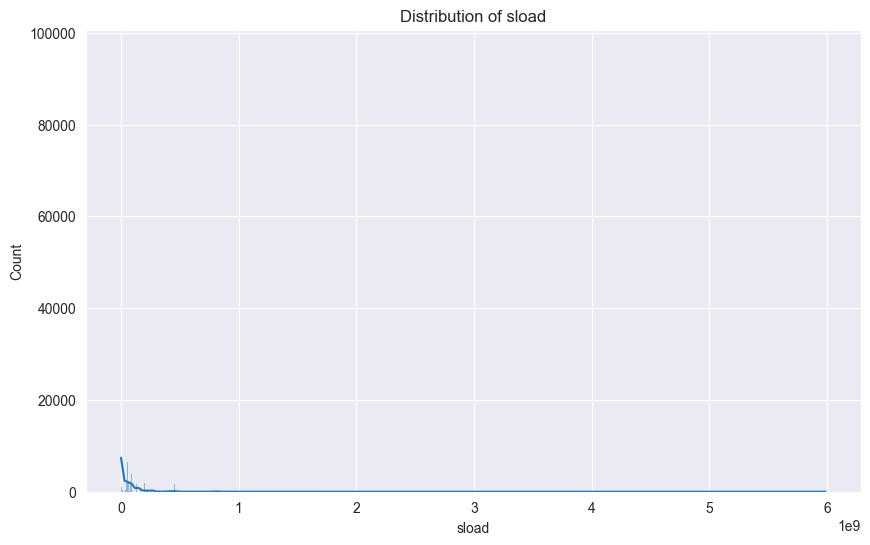

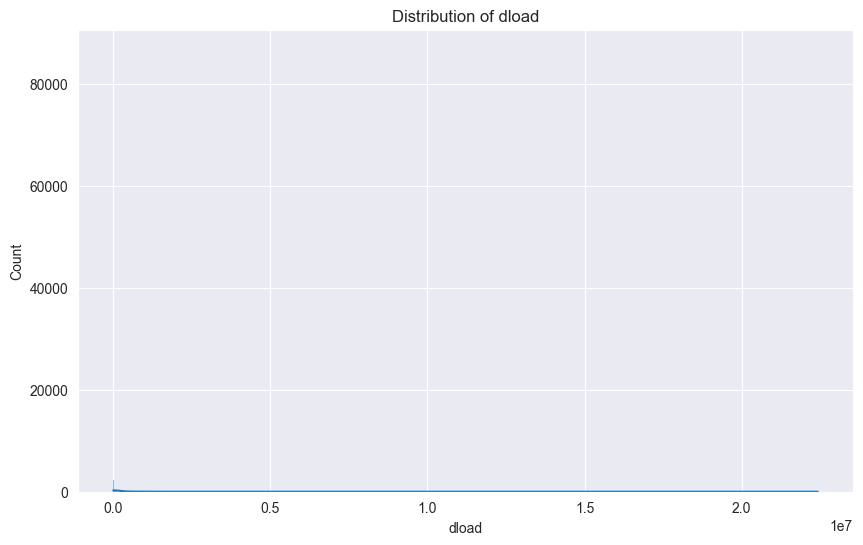

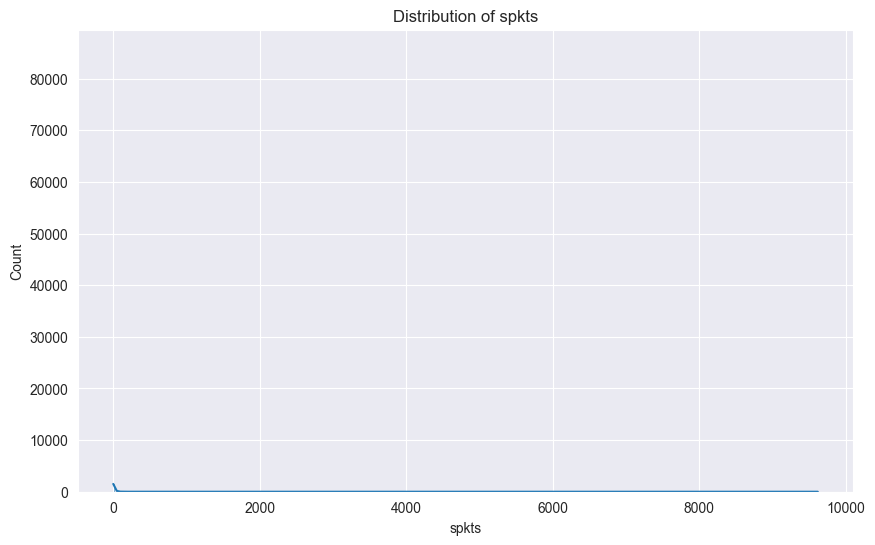

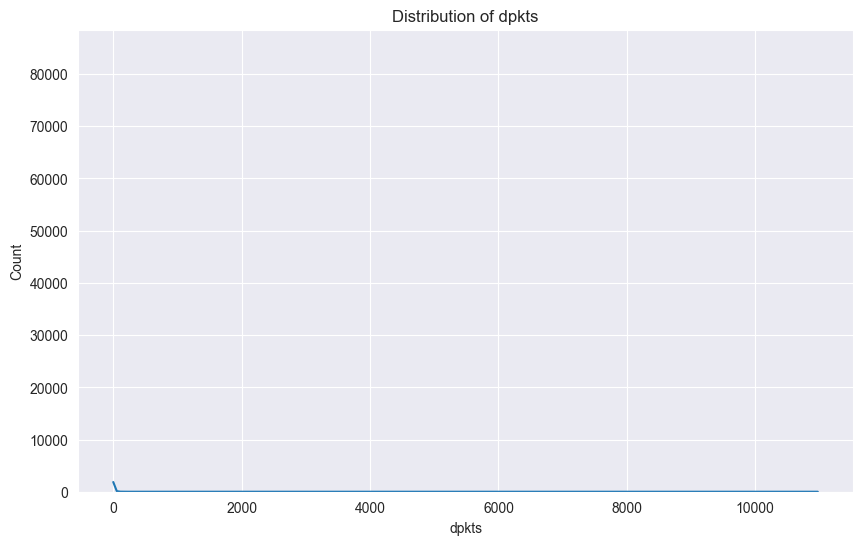

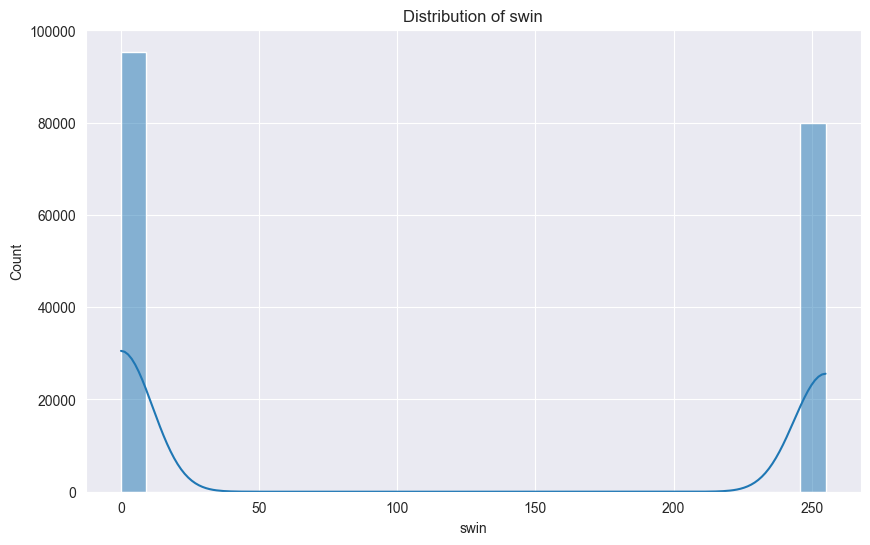

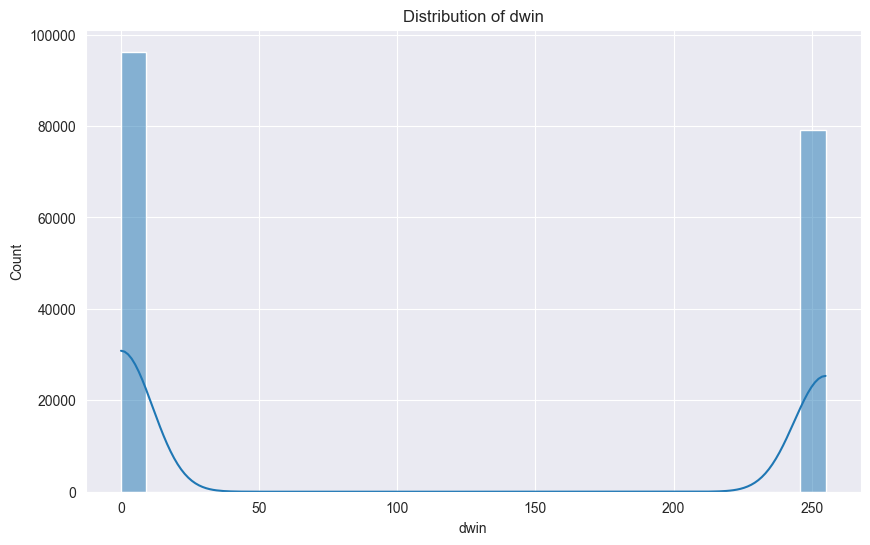

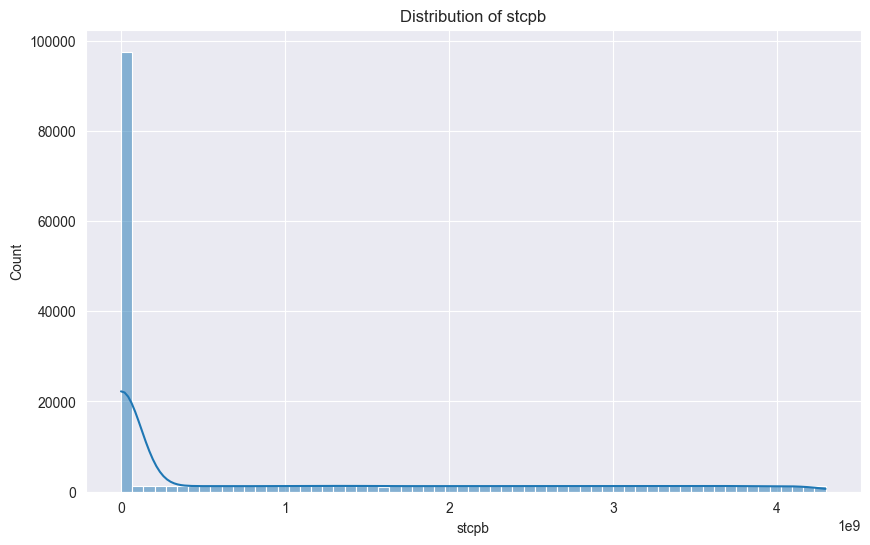

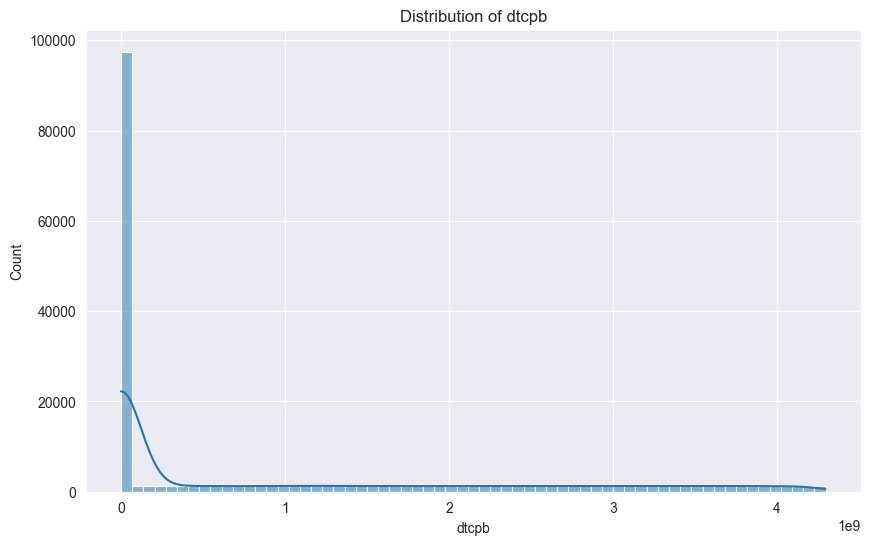

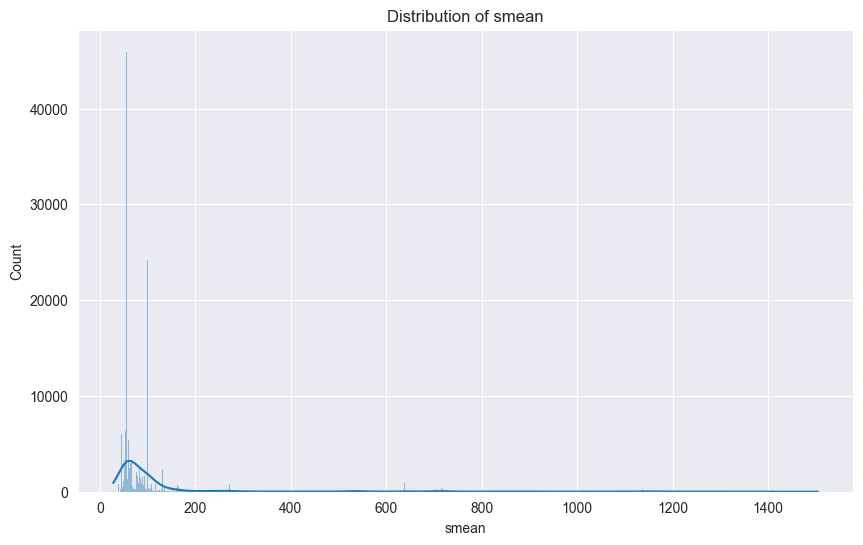

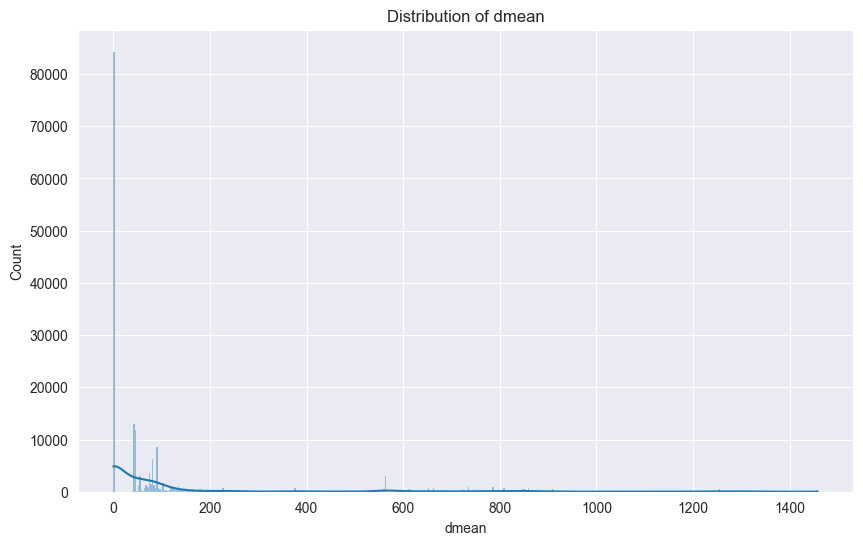

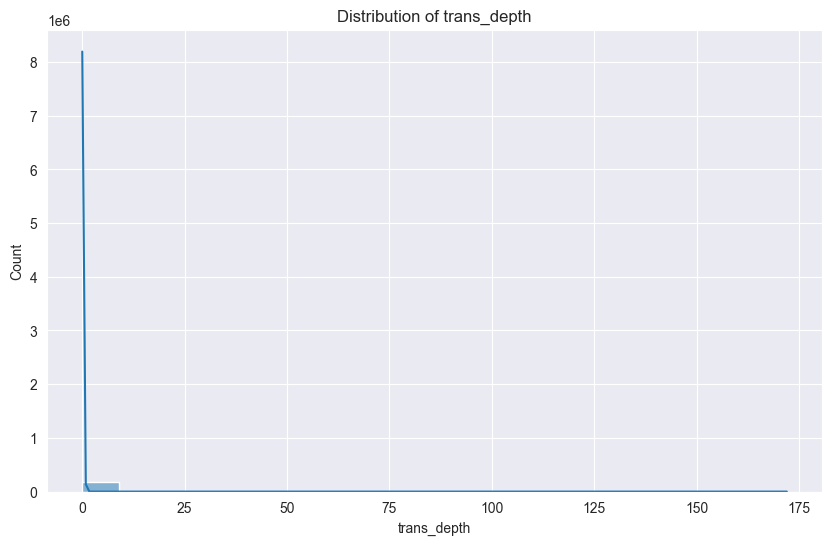

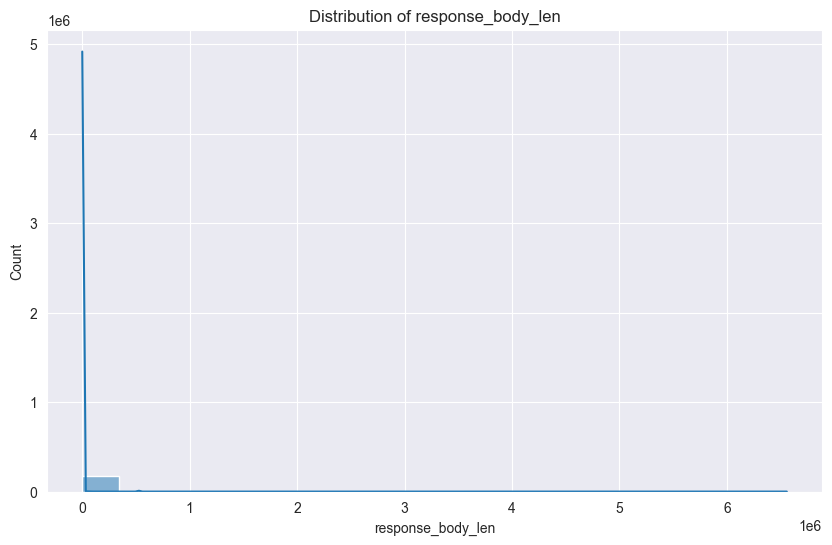

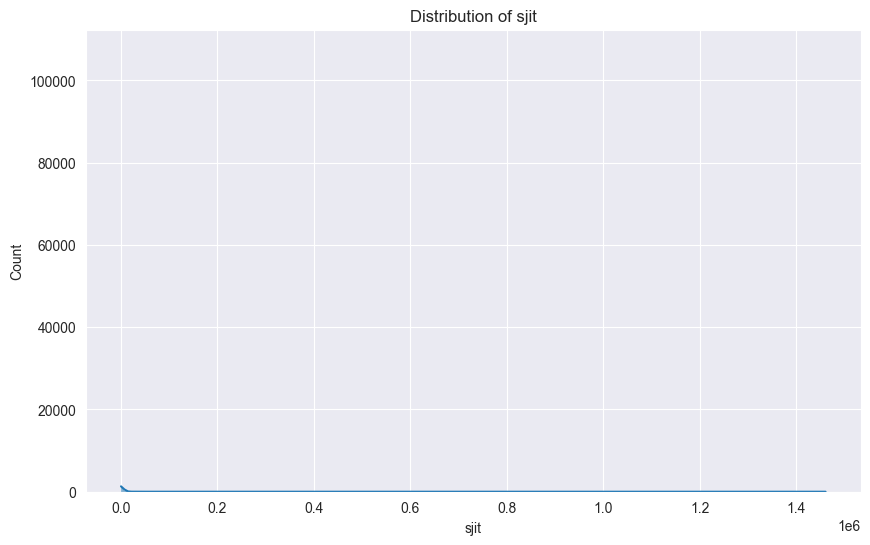

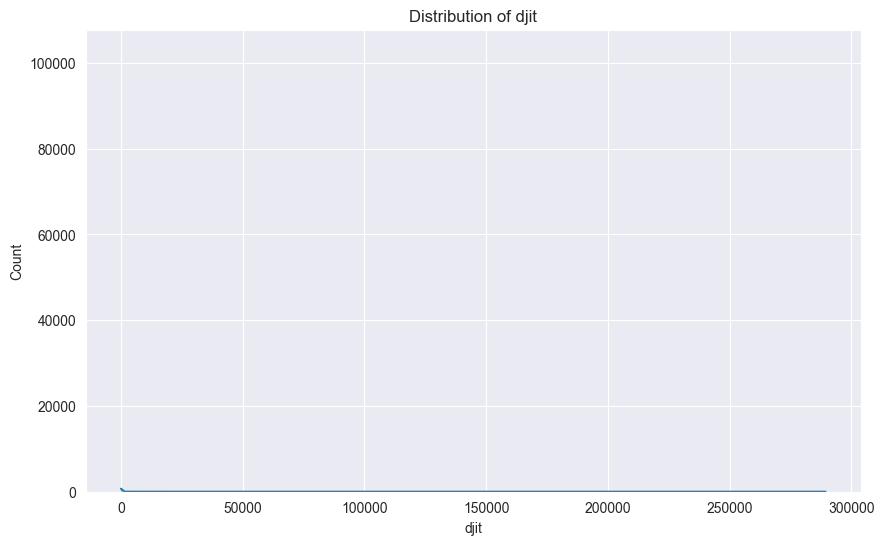

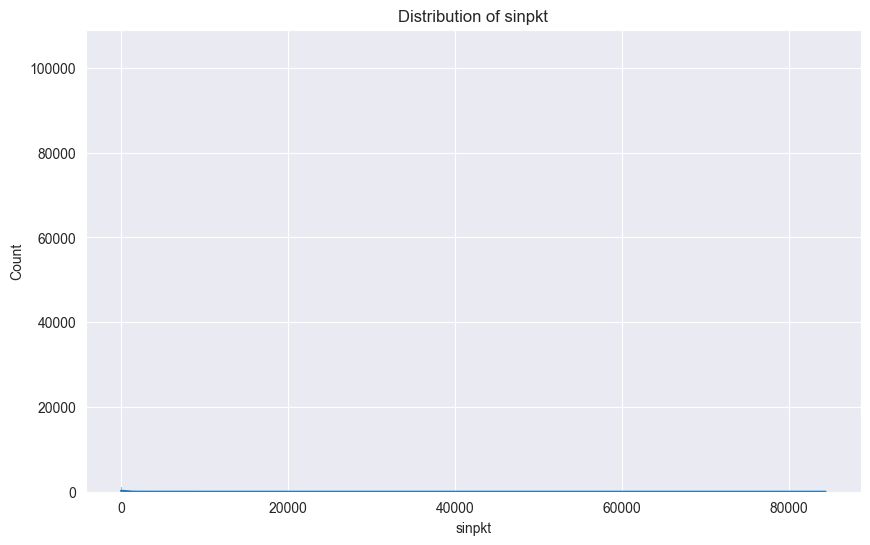

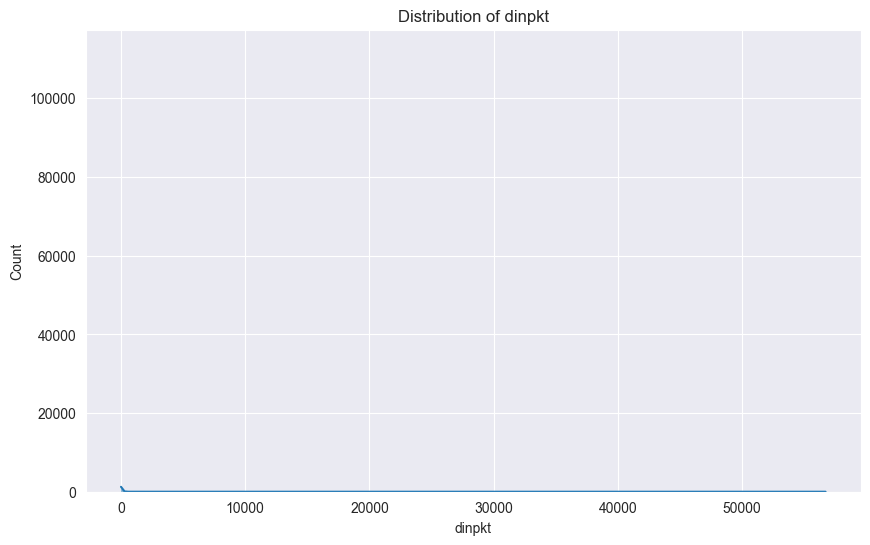

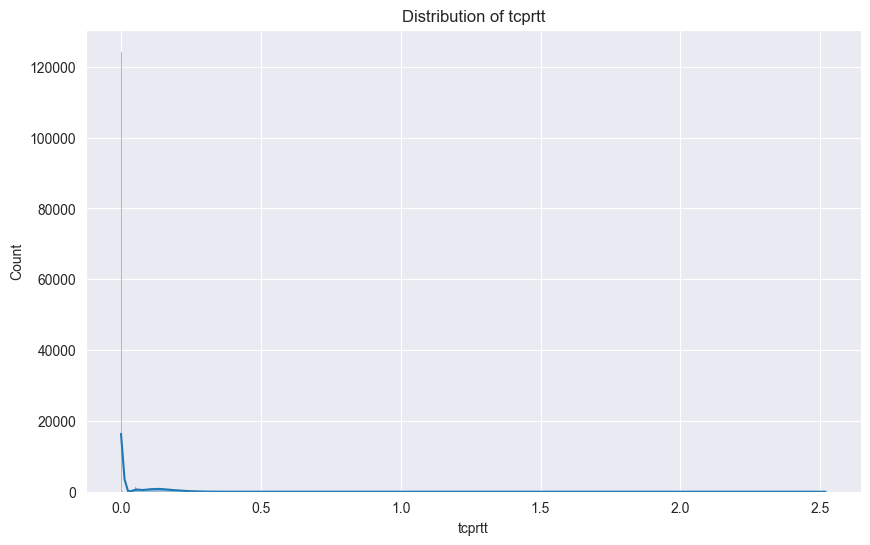

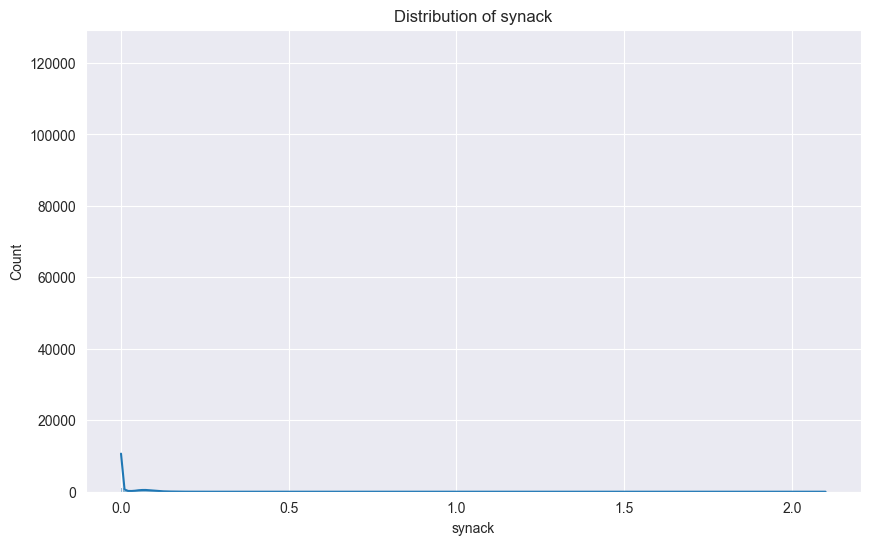

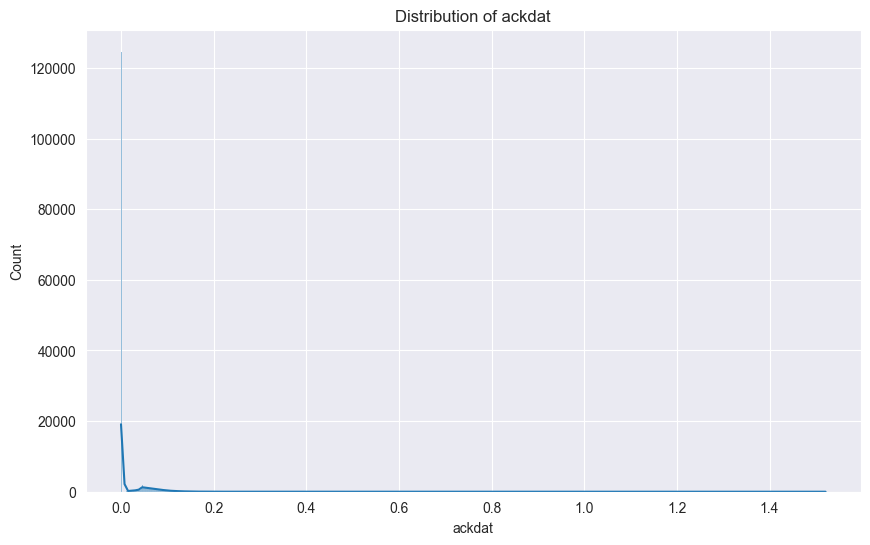

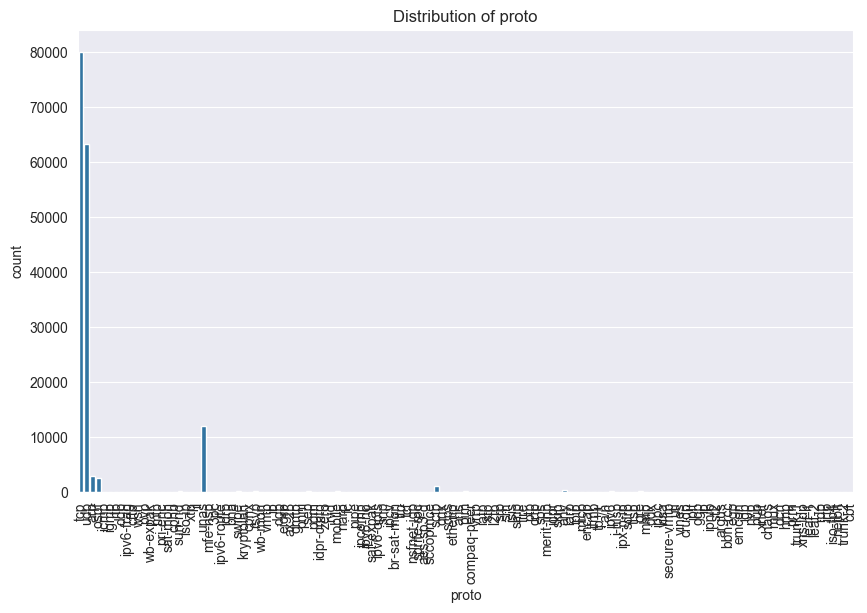

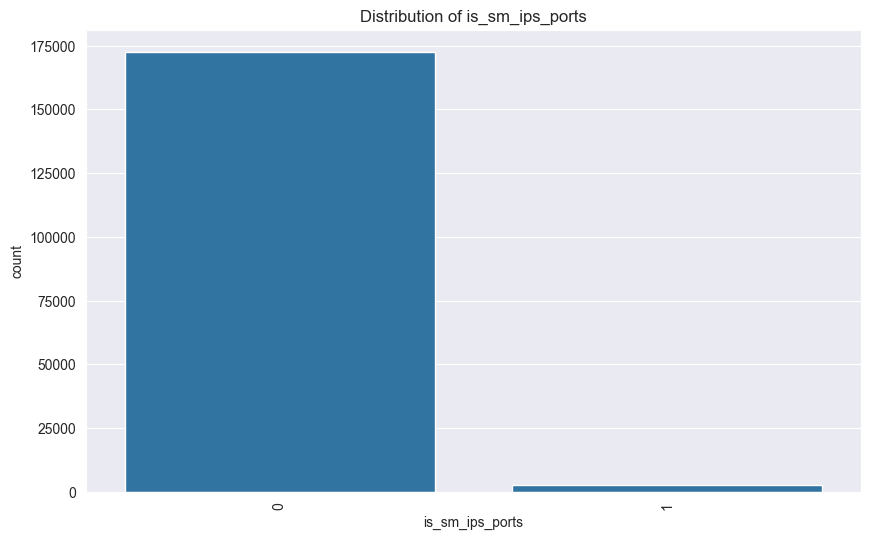

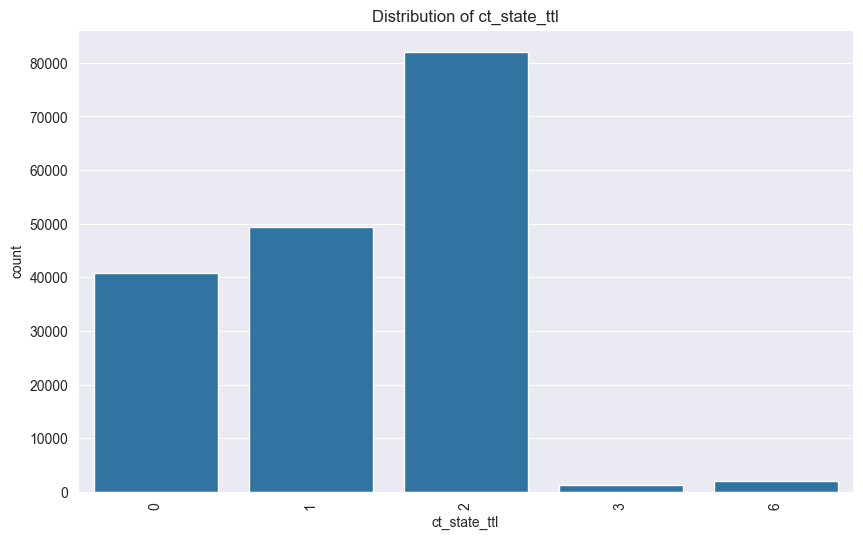

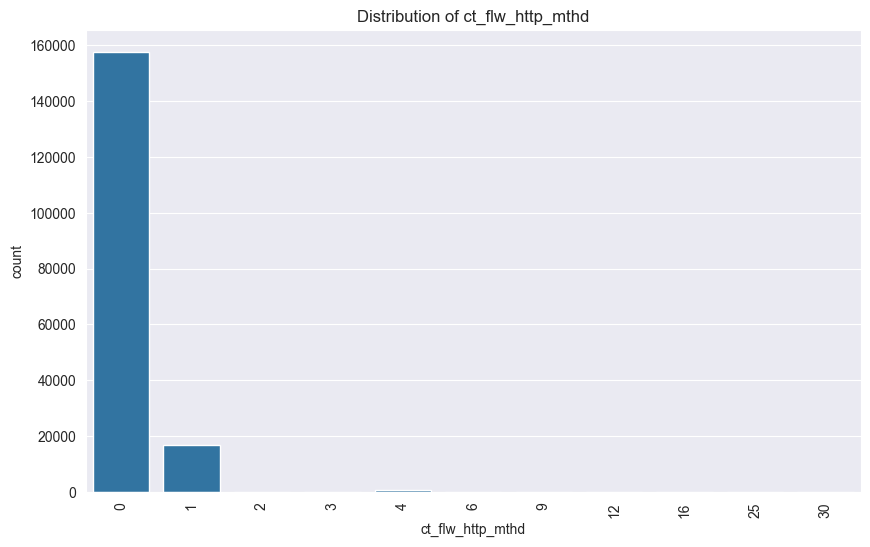

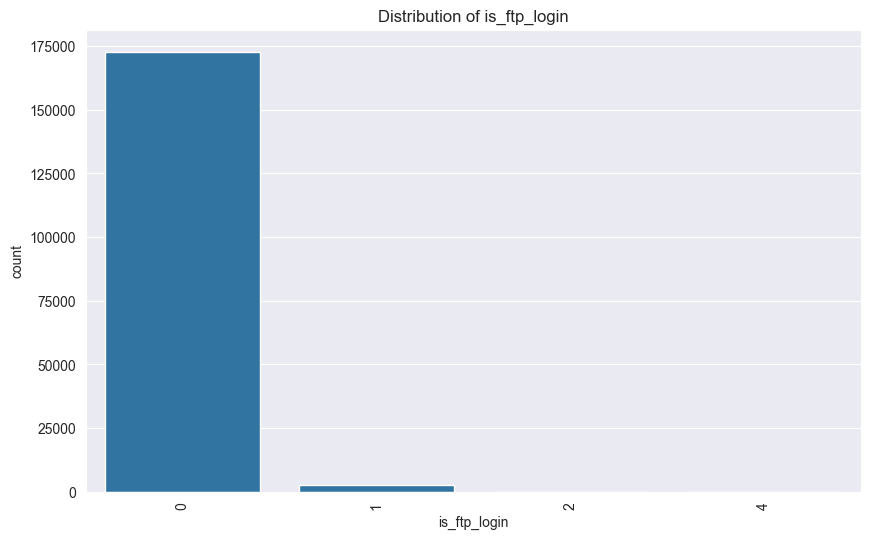

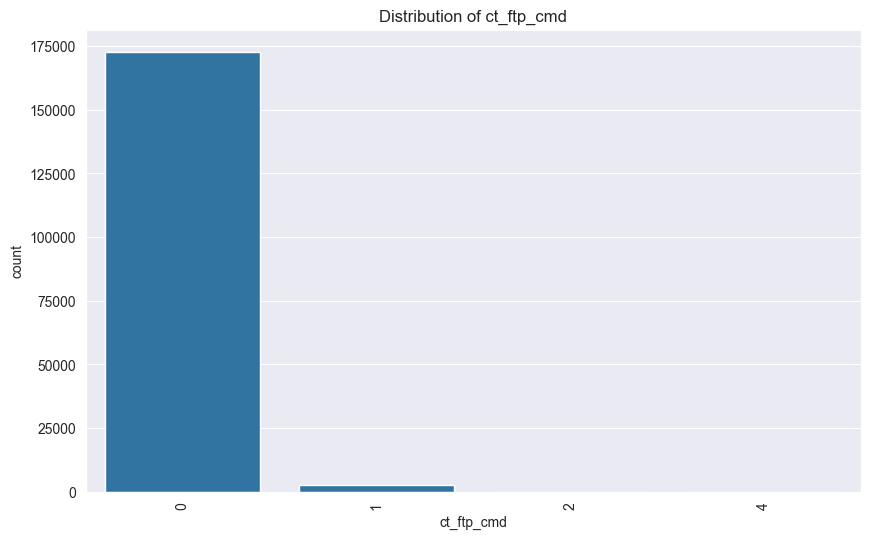

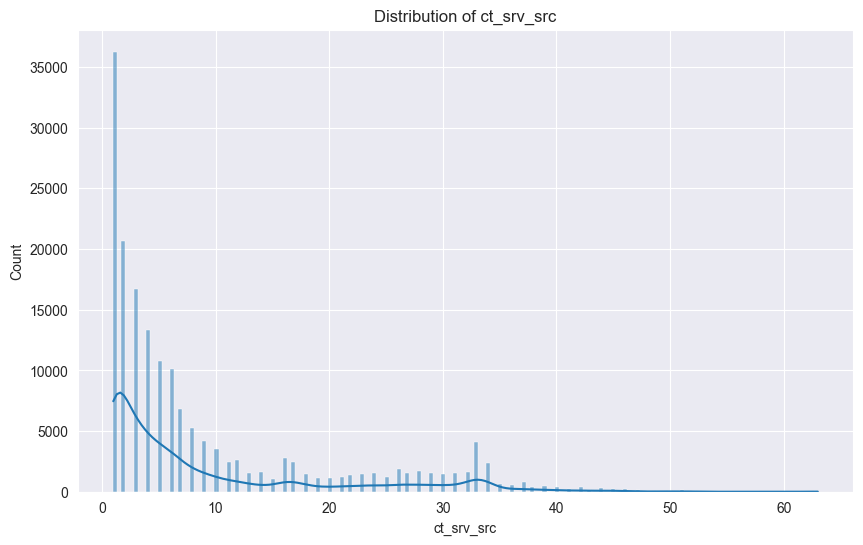

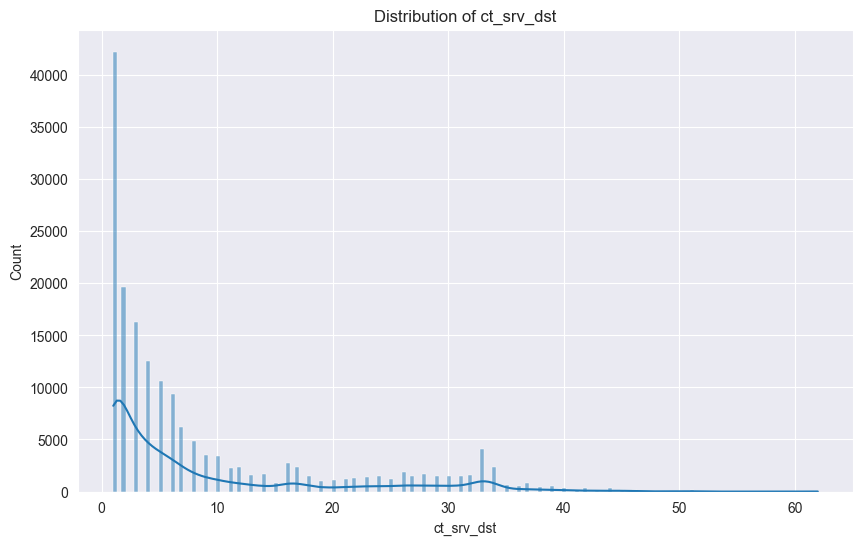

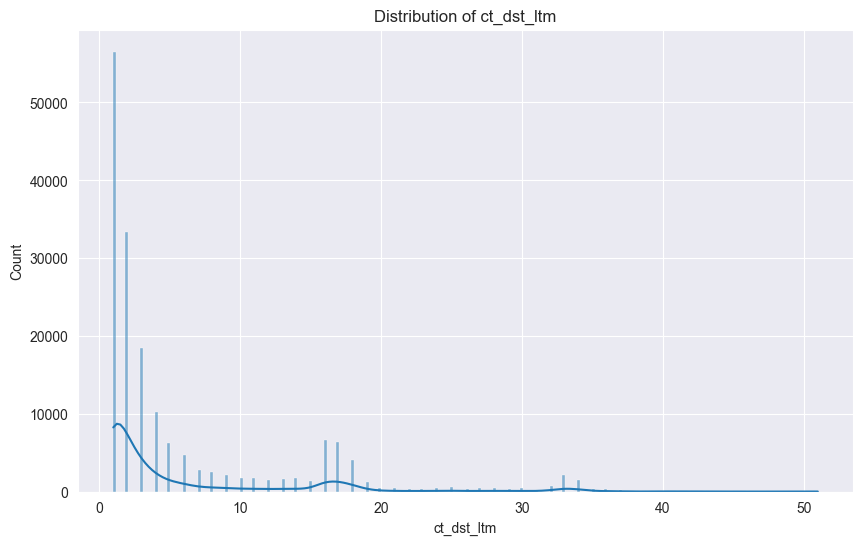

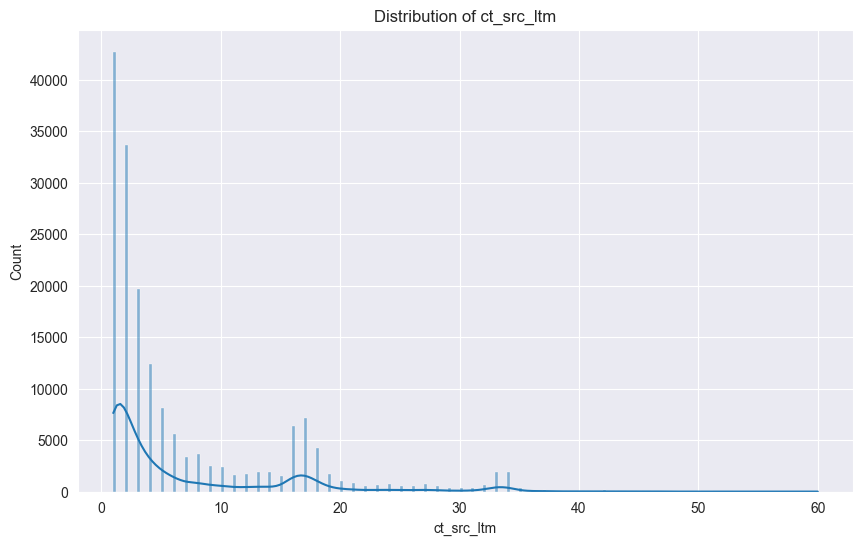

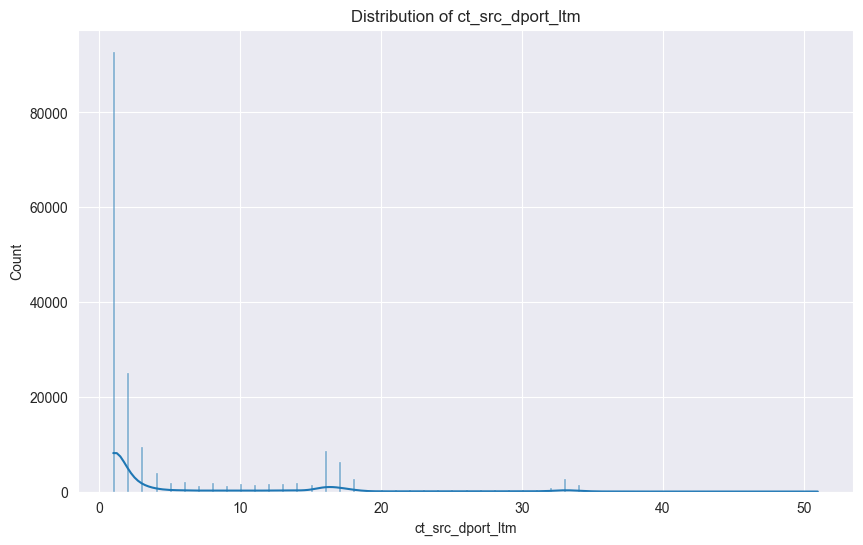

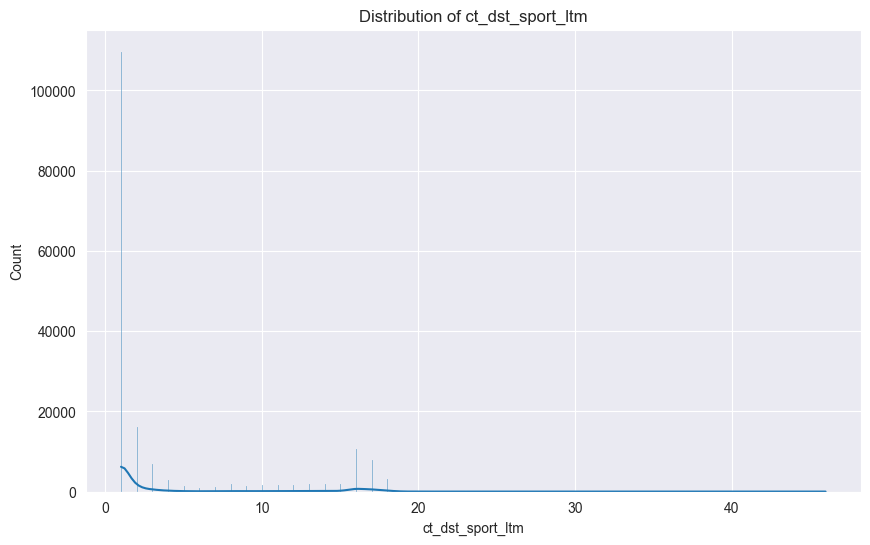

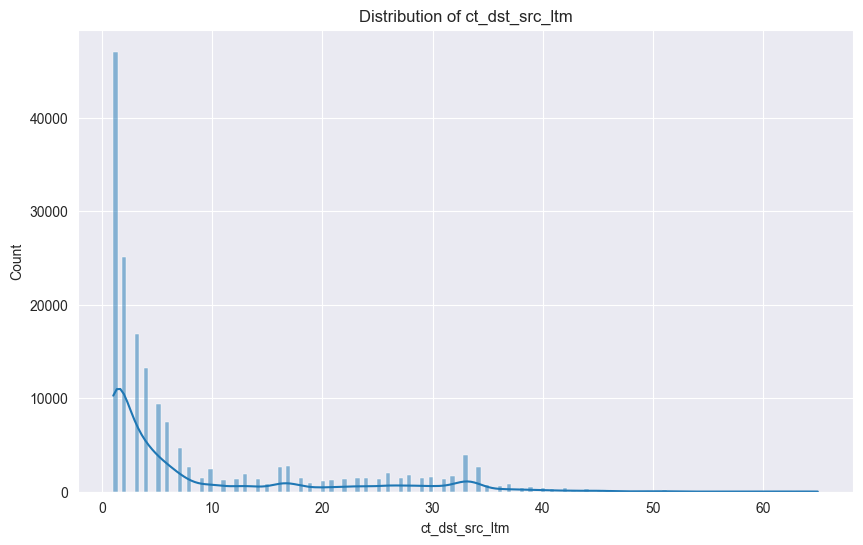

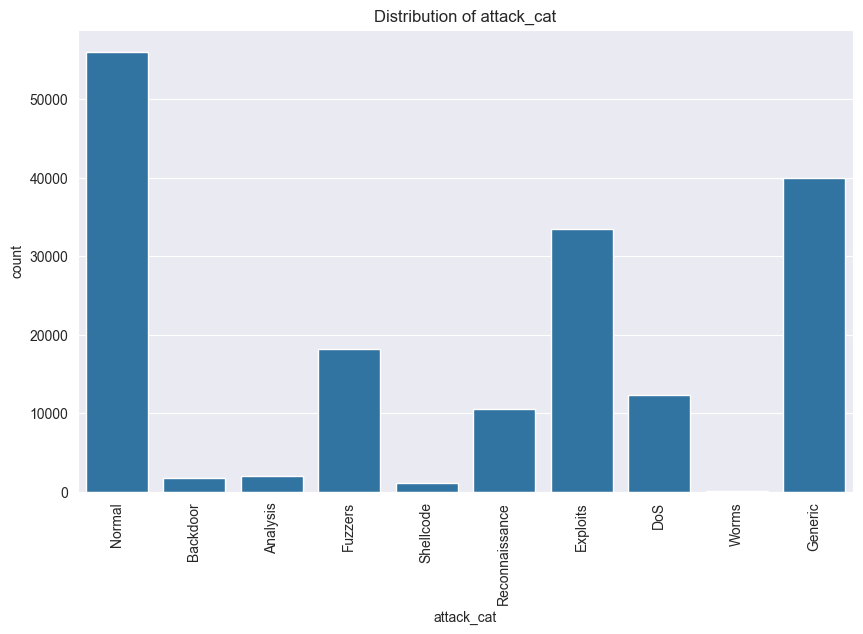

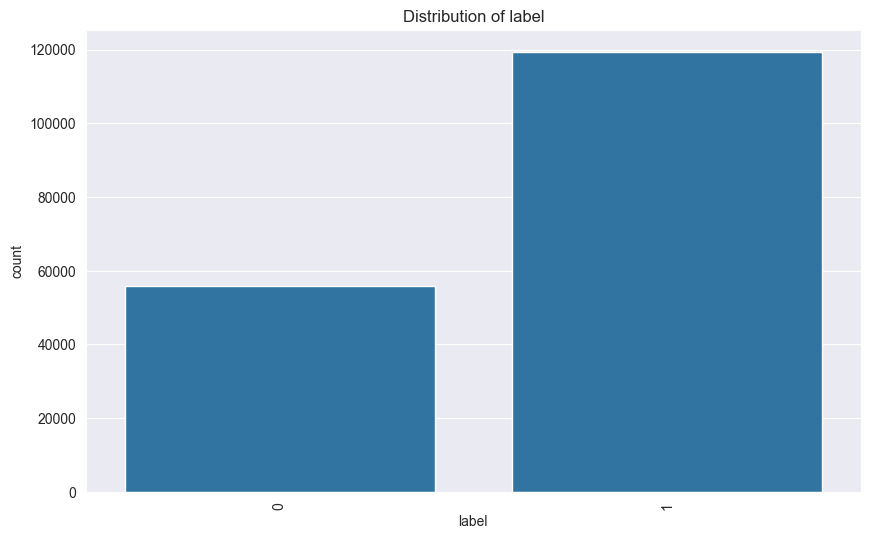

In [14]:
for col in df.columns:
    if col in categorical_col:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=df)
        plt.xticks(rotation=90)
        plt.title(f"Distribution of {col}")
        plt.show()
    else:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()

#### Visualize the correlation between features and the target variable.

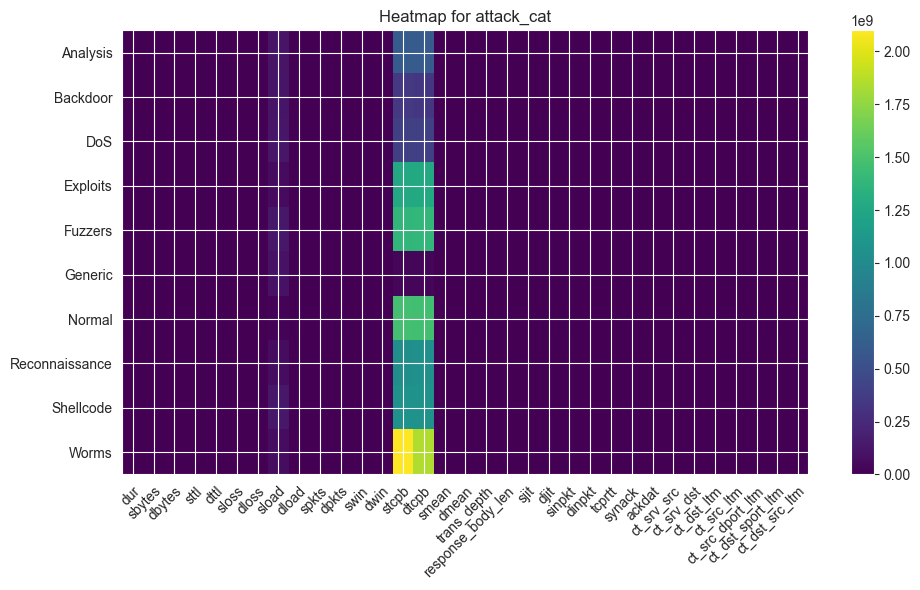

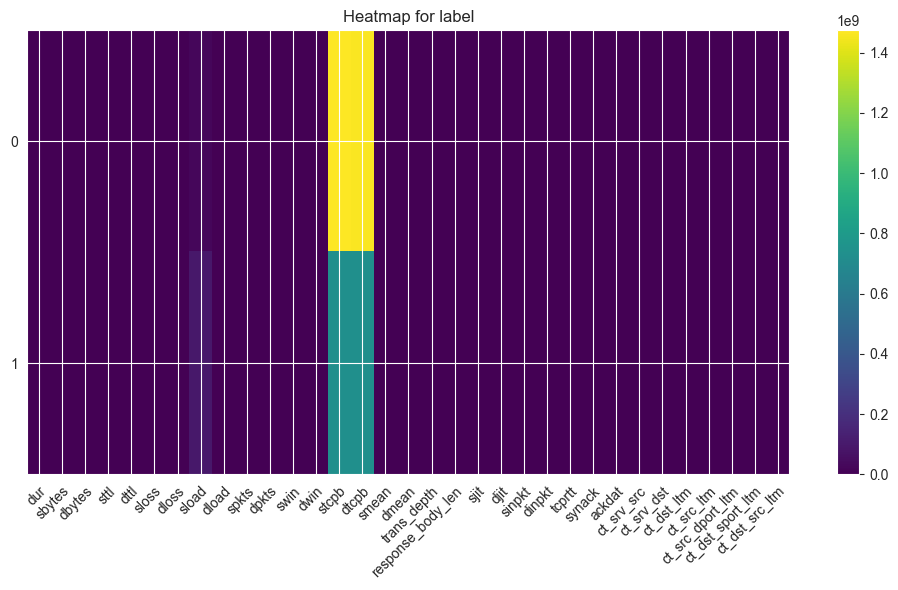

In [15]:
target_col = ['attack_cat', 'label']
for cat_col in target_col:
    # Calculate mean values of numerical columns for each category
    pivot_table = df.groupby(cat_col)[non_categorical_col].mean()

    fig, ax = plt.subplots(figsize=(10, 6))
    im = ax.imshow(pivot_table, aspect="auto", cmap="viridis")

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(non_categorical_col)), labels=non_categorical_col)
    ax.set_yticks(np.arange(len(pivot_table.index)), labels=pivot_table.index)

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    for i in range(len(pivot_table.index)):
        for j in range(len(non_categorical_col)):
            text = ax.text(j, i, "", ha="center", va="center", color="w")

    ax.set_title(f"Heatmap for {cat_col}")
    fig.tight_layout()
    plt.colorbar(im)
    plt.show()

#### Explain the significance of understanding feature distributions and correlations.

Understanding feature distributions and correlations is important to understand the data characteristics and relationships between features. By understanding data distribution, we can understand how the data pattern and which models can be used to process the data, identify data imbalance or skewness and outliers, and scaling. We also need to understand the correlation between features to identify multicollinearity, which can affect the model performance. Understanding the correlation between features and the target variable is important to identify which features are important for the model and which features can be removed to improve the model performance, and to identify which features affect the target variable and other features too.

## B. Data Insights

The objective of this section is for participants to understand how to formulate and get many insights from the given data so that we can improve the model performance. Given example questions:

1. What are the most common protocols (proto) in the dataset, and are certain protocols more associated with specific attack categories?
2. Are there significant differences in the values of network characteristics such as sload, sload, sbytes, and dbytes between attack and normal records?
3. How does TCP-setup-related features vary, such as tcprtt, synack, and ackdat, across normal records and each type of attack records?

### Step 1

Answer the three example questions by visualizing and explaining the insights for each question. Add markdown texts to explain the visualizations.

#### 1. What are the most common protocols (proto) in the dataset, and are certain protocols more associated with specific attack categories?

To find the most common protocols in the dataset, we can use the countplot to visualize the distribution of the protocol column. We can also use the heatmap to visualize the correlation between the protocol and attack category columns

##### The 10 most common protocols

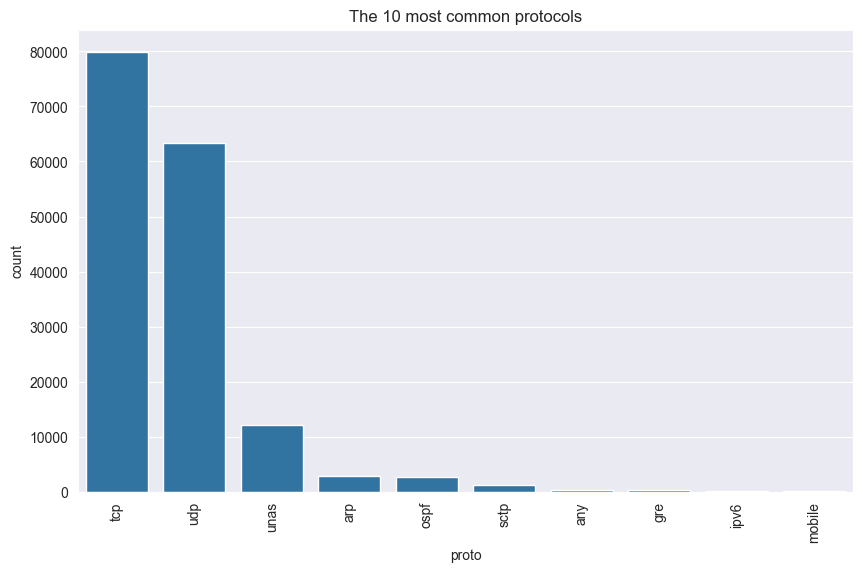

##### The most common protocol in the dataset is tcp

In [16]:
print_markdown("##### The 10 most common protocols")
plt.figure(figsize=(10, 6))
sns.countplot(x='proto', data=df, order=df['proto'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title("The 10 most common protocols")
plt.show()

print_markdown(f"##### The most common protocol in the dataset is {df['proto'].mode()[0]}")

##### Correlation between protocol and attack category

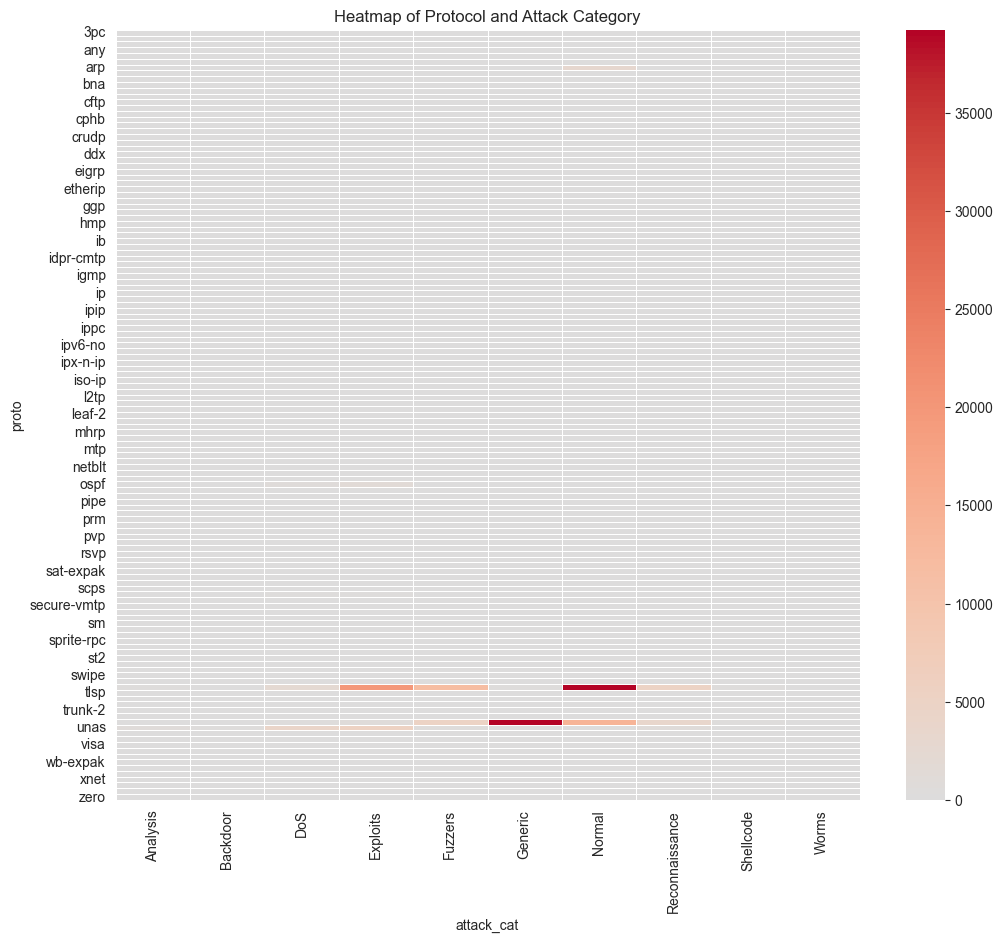

##### The most correlated protocol with attack category with values:

Top 10 Most Correlated Pairs (attack_cat, proto):
proto  attack_cat    
udp    Generic           39229
tcp    Normal            39121
       Exploits          19689
udp    Normal            13922
tcp    Fuzzers           11761
unas   Exploits           5280
tcp    Reconnaissance     5100
udp    Fuzzers            4945
unas   DoS                4080
udp    Reconnaissance     3586
dtype: int64


In [94]:
print_markdown("##### Correlation between protocol and attack category")
pivot_table = df.groupby('proto')['attack_cat'].value_counts().unstack().fillna(0)
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=False, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")
plt.title("Heatmap of Protocol and Attack Category")
plt.show()

print_markdown("##### The most correlated protocol with attack category with values:")
cross_tab = pd.crosstab(df['attack_cat'], df['proto'])

most_common_pairs = cross_tab.unstack().sort_values(ascending=False).head(10)
print("Top 10 Most Correlated Pairs (attack_cat, proto):")
print(most_common_pairs)

#### 2. Are there any significant differences in the values of network characteristics such as Sload, Dload, sbytes, and dbytes between attack and normal records?

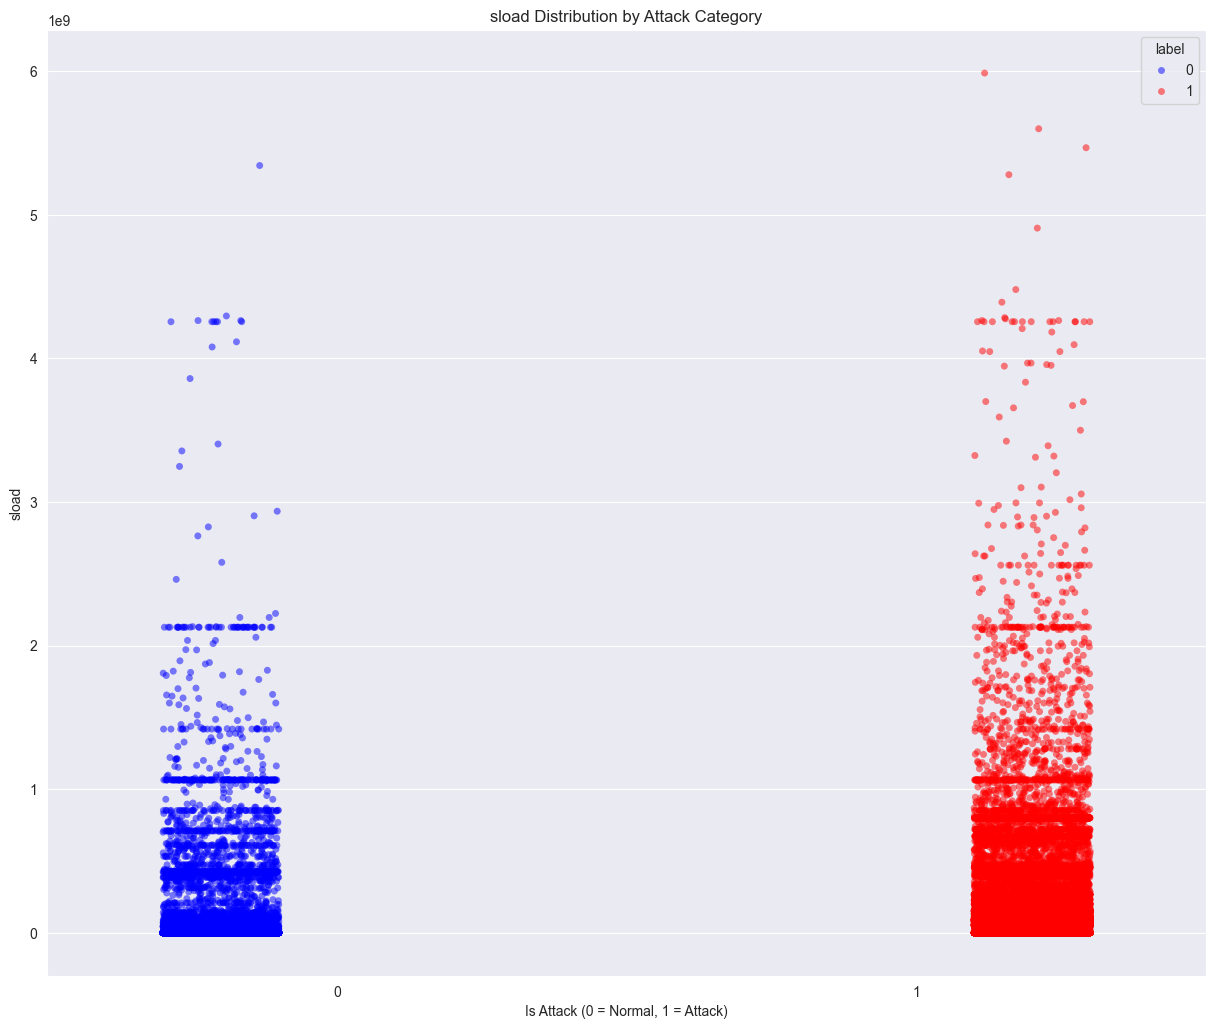

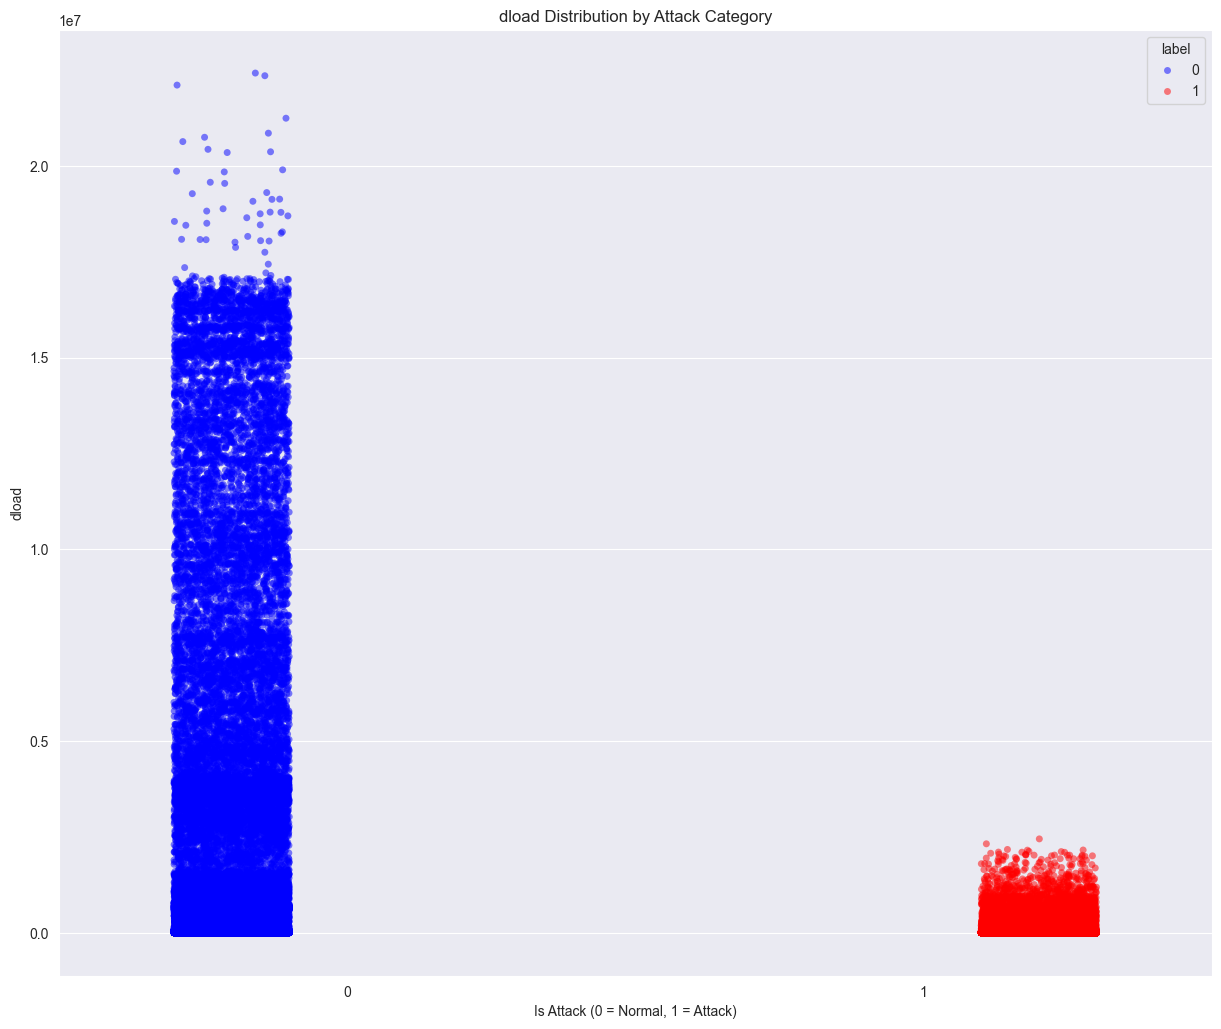

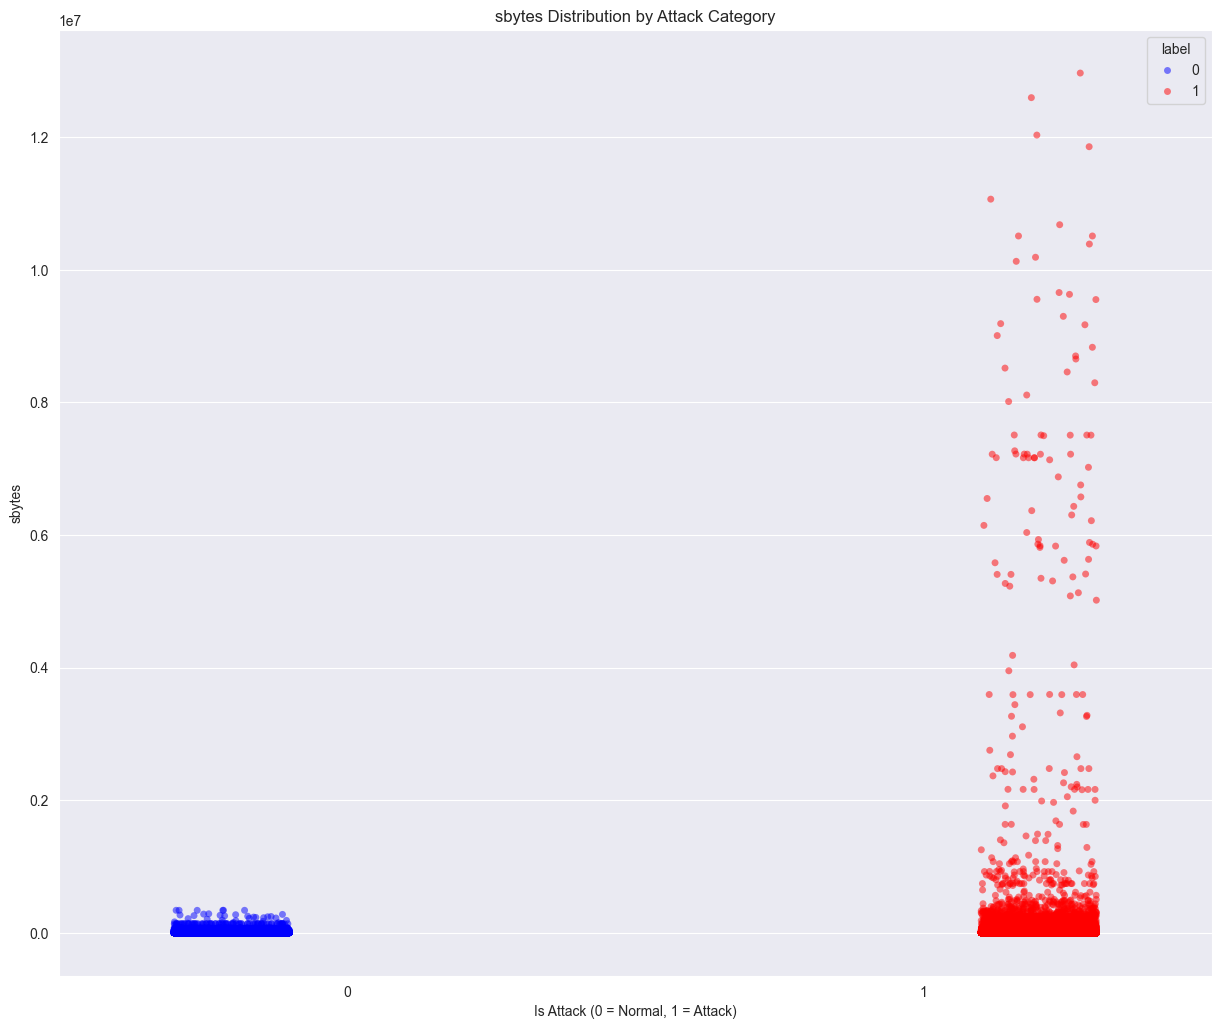

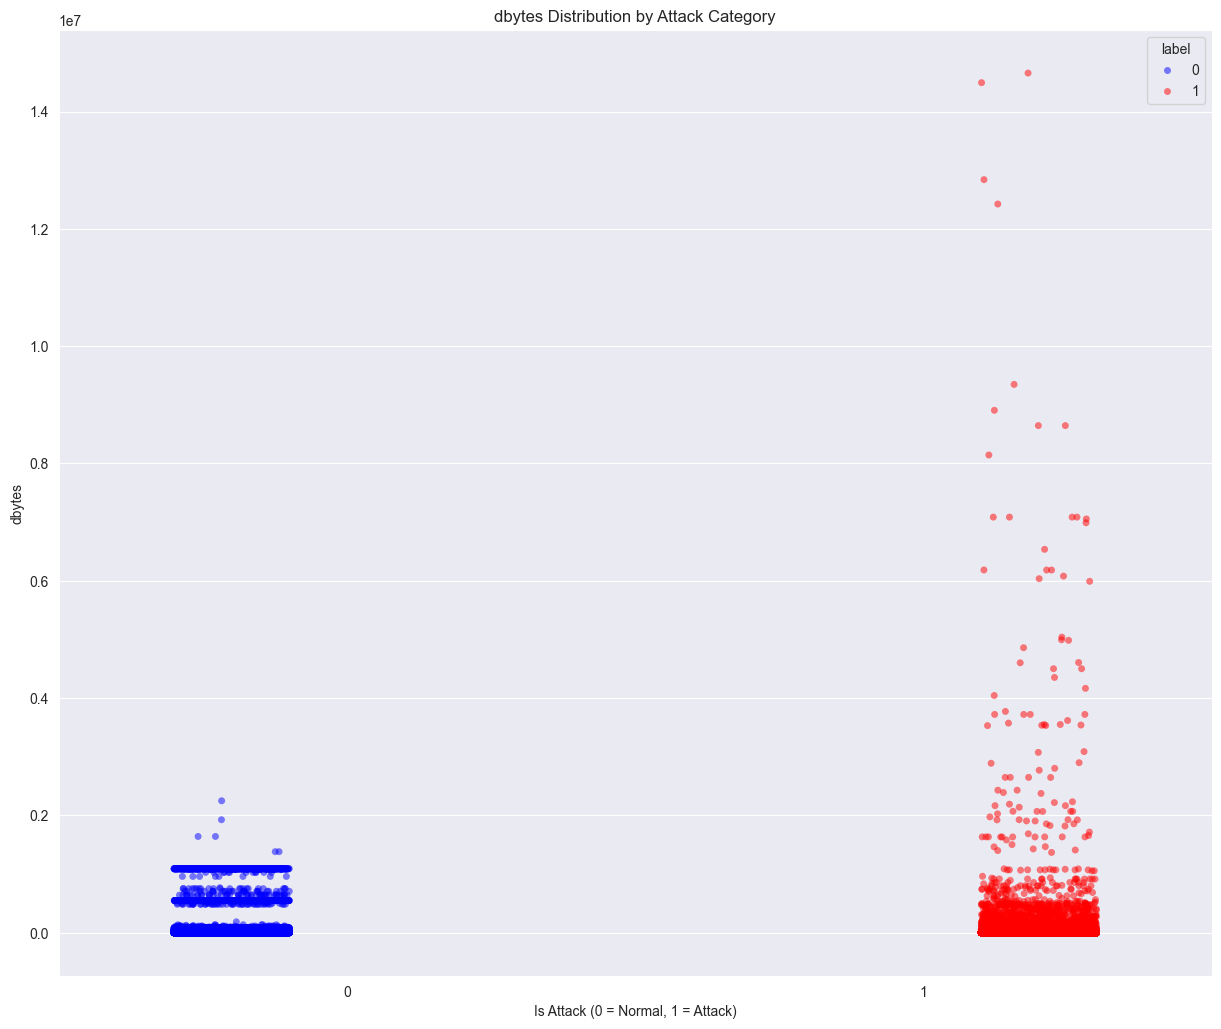

In [51]:
network_characteristics = ['sload', 'dload', 'sbytes', 'dbytes']


for i, col in enumerate(network_characteristics, 1):
    plt.figure(figsize=(24, 20))
    plt.subplot(2, 2, i)
    sns.stripplot(x='label', y=col, data=df, jitter=0.2, hue='label', palette={0: 'blue', 1: 'red'}, alpha=0.5, dodge=True)
    plt.title(f"{col} Distribution by Attack Category")
    plt.xlabel("Is Attack (0 = Normal, 1 = Attack)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

Based on the visualization, we can see that the source bits per second (sload) for attack records are higher than normal records. The destination bits per second (dload) values for attack records are also higher than normal records. The source to destination transaction bits (sbytes) values for attack records are higher than normal records, while the destination to source transaction bits (dbytes) values for attack records are lower than normal records. This indicates that the network characteristics such as sload, dload, sbytes, and dbytes can be used to differentiate between attack and normal records.

#### 3. How does TCP-setup-related features vary, such as tcprtt, synack, and ackdat, across normal records and each type of attack records?

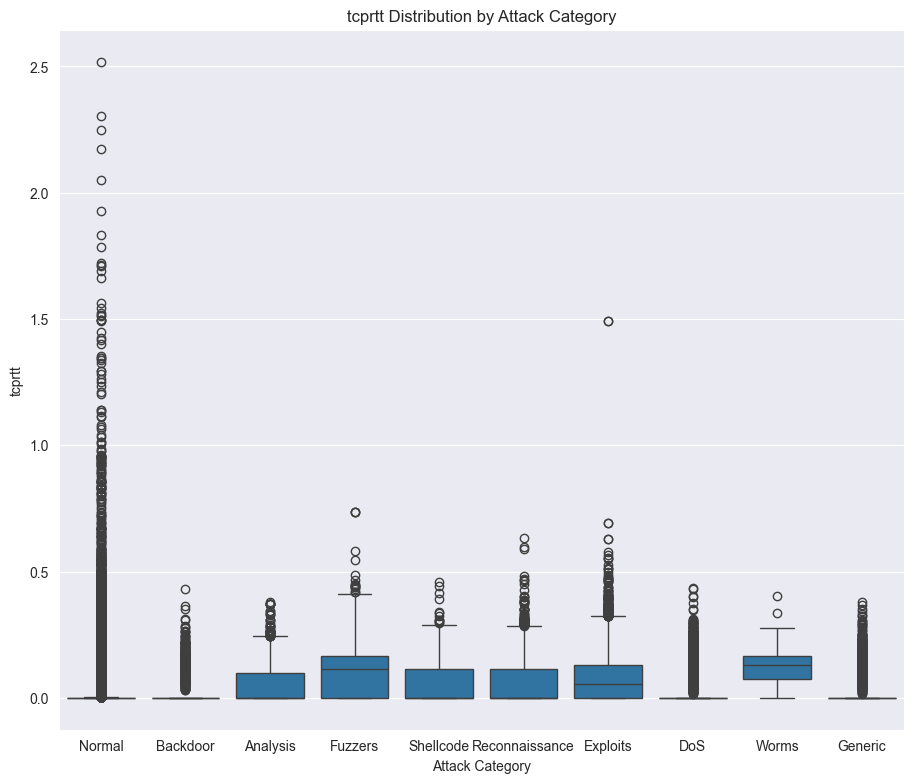

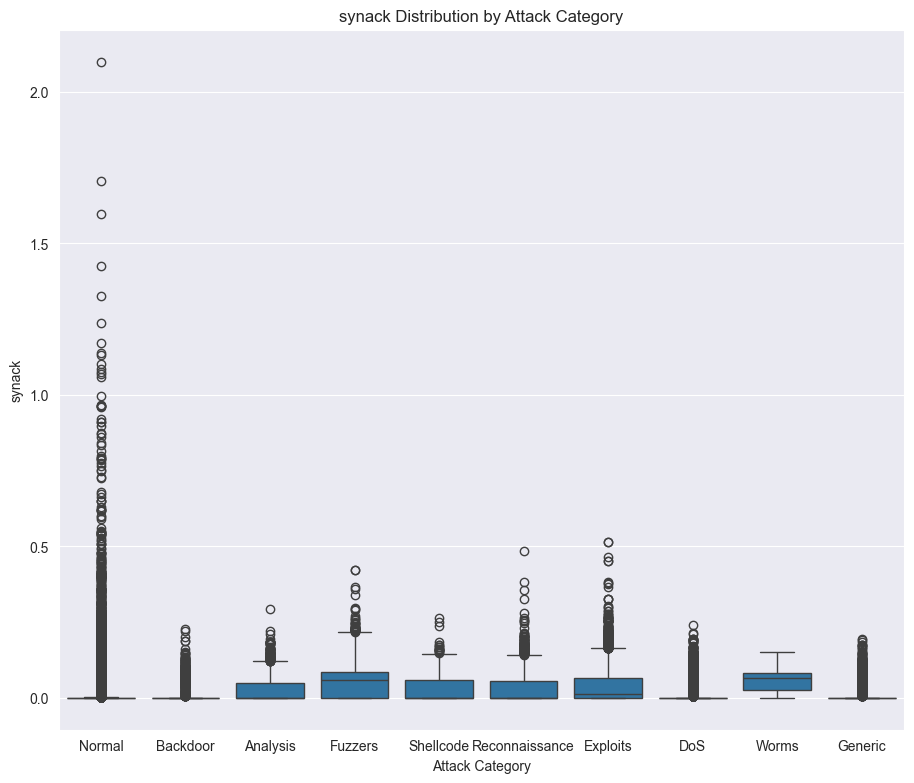

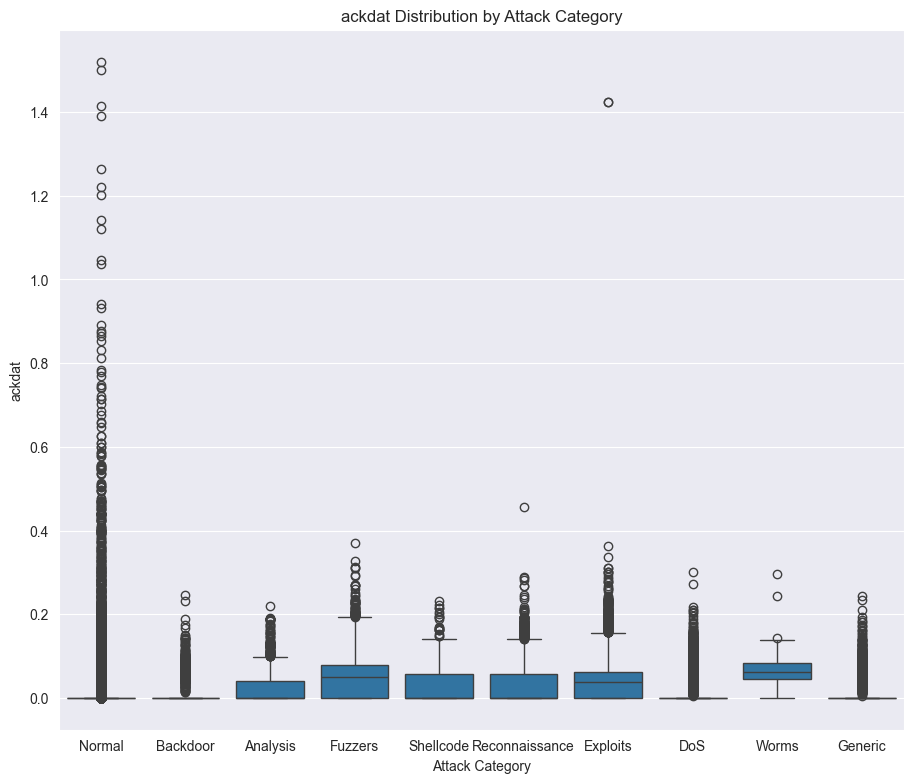

In [33]:
tcp_setup_features = ['tcprtt', 'synack', 'ackdat']

for i, col in enumerate(tcp_setup_features, 1):
    plt.figure(figsize=(24, 20))
    plt.subplot(2, 2, i)
    sns.boxplot(x='attack_cat', y=col, data=df)
    plt.title(f"{col} Distribution by Attack Category")
    plt.xlabel("Attack Category")
    plt.ylabel(col)
    plt.show()

Based on the visualization, we can see the TCP connection RTT time (tcprtt) for normal are higher than any other attacks, followed by exploits and fuzzers. The synack diagram shows the time between the SYN and ACK packets for normal records are higher than any other attacks, followed by exploits and fuzzers. The ackdat diagram shows the time between the ACK and data packets for normal records are higher than any other attacks, followed by exploits and fuzzers. This indicates that the TCP-setup-related features such as tcprtt, synack, and ackdat can be used to differentiate between normal records and each type of attack records. 

### Step 2

Try to formulate five other new questions and answer them with the methods used before.

#### 4. What types of attack categories are the most time-consuming in terms of the duration of the connection (dur) and the number of packets (spkts)?

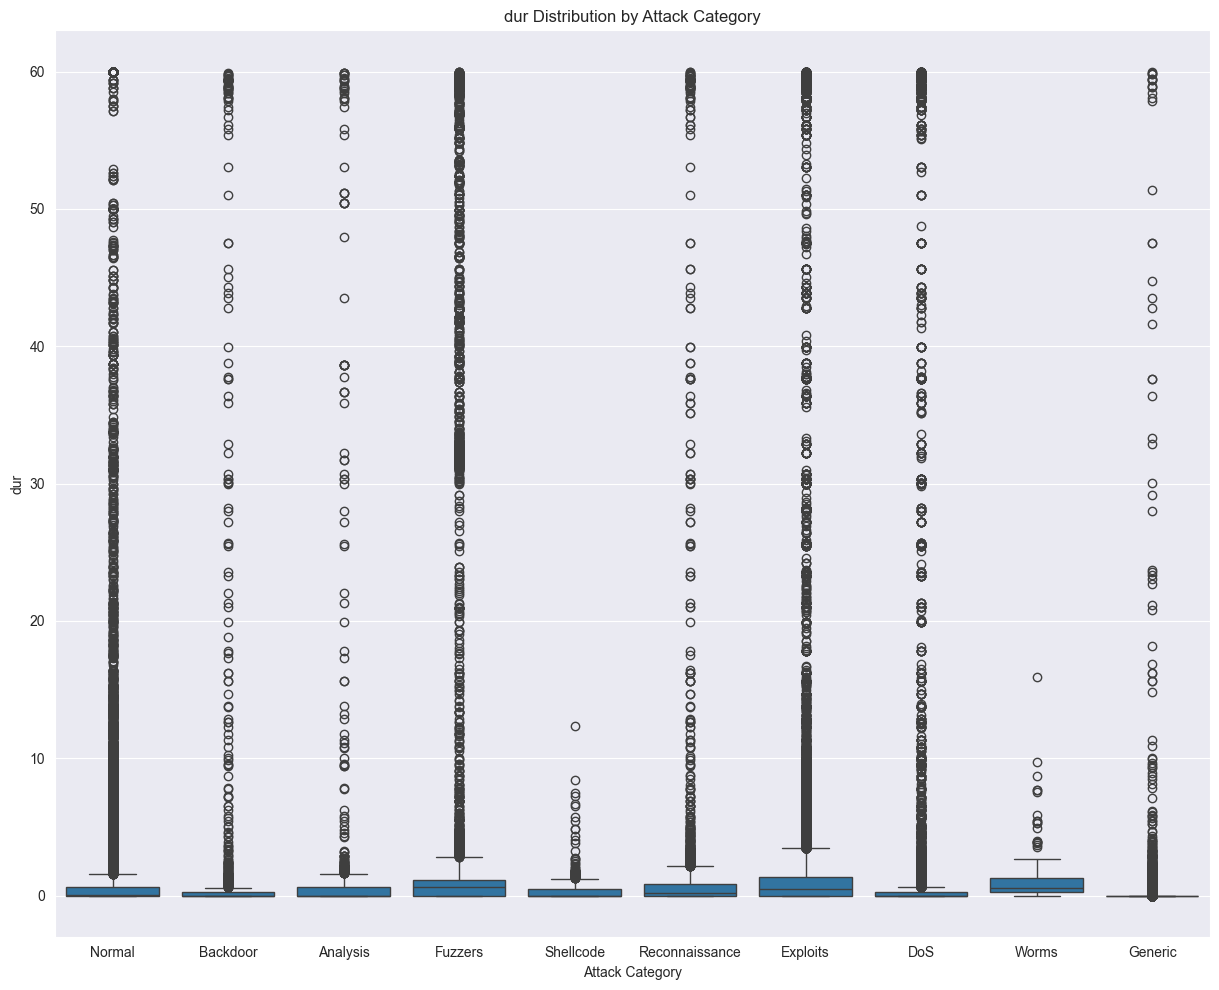

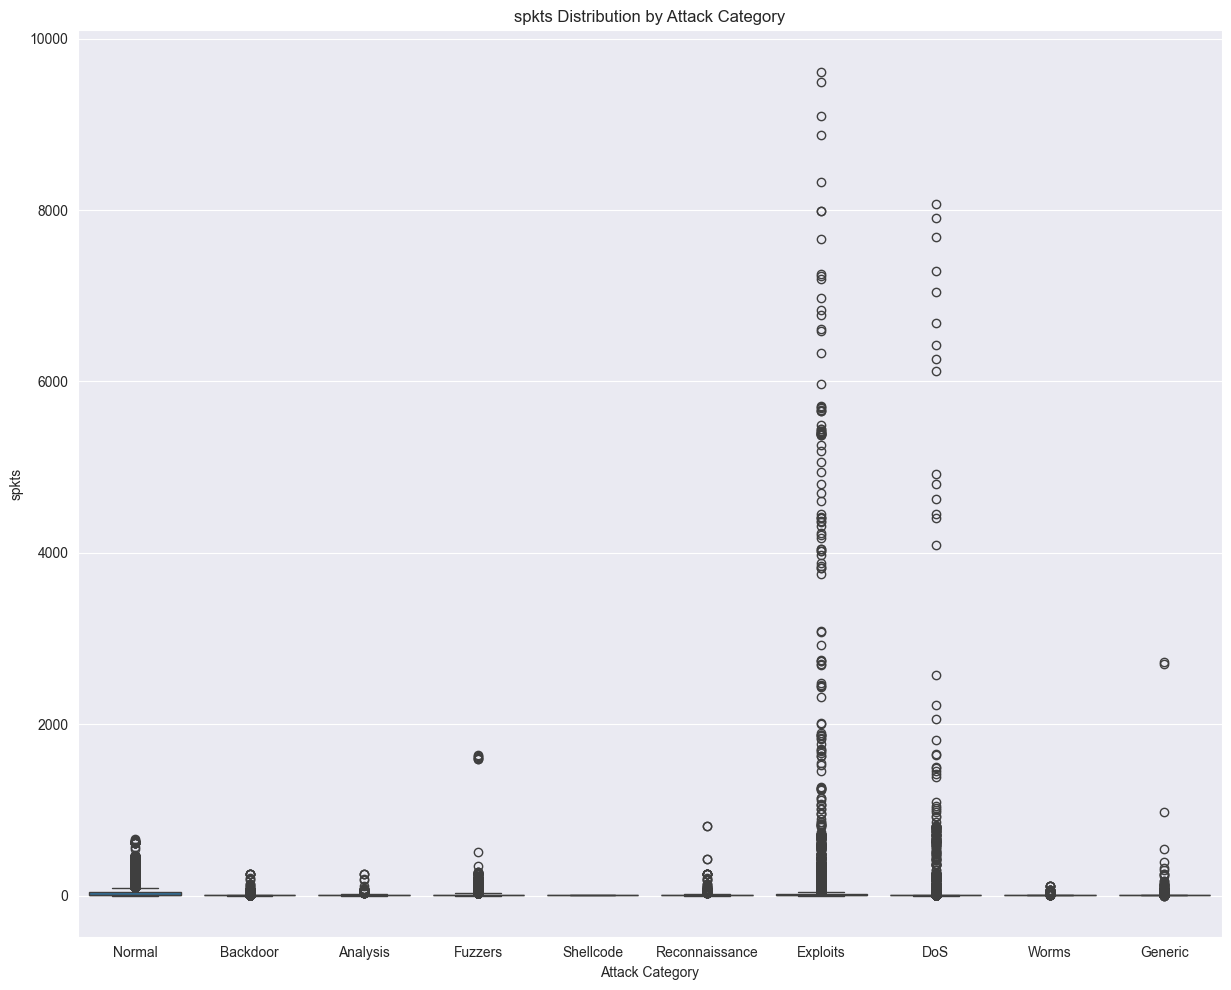

In [36]:
# List of features related to duration and number of packets
time_consuming_features = ['dur', 'spkts']

# Generate boxplots for each feature
for i, col in enumerate(time_consuming_features, 1):
    plt.figure(figsize=(24, 10))
    plt.subplot(1, 2, i)
    sns.boxplot(x='attack_cat', y=col, data=df)
    plt.title(f"{col} Distribution by Attack Category")
    plt.xlabel("Attack Category")
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

Based on the visualization, the density of fuzzers for high duration of connection (dur) is higher than any other attacks, followed by exploits and analysis. Meanwhile in terms of number of packets sent (spkts) is exploits, and lowest is shellcode.

#### 5.  What service used the most in the dataset, and are certain services more associated with specific attack categories?

In [38]:
print_markdown("##### The 10 most common services")
print(df['service'].value_counts().head(10))
print("Based on the data, the most common service is DNS service followed by HTTP and SMTP")

##### The 10 most common services

service
-           94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
Name: count, dtype: int64
Based on the data, the most common service is DNS service followed by HTTP and SMTP


##### Correlation between service and attack category

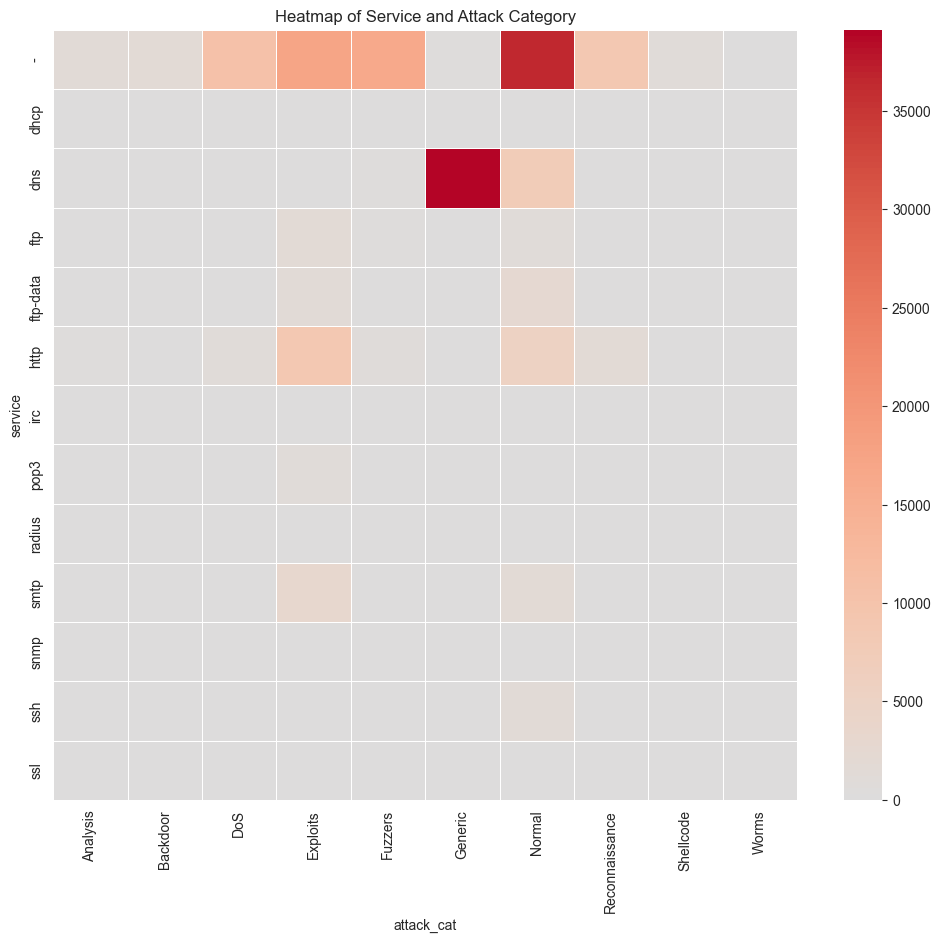

In [39]:
print_markdown("##### Correlation between service and attack category")
pivot_table = df.groupby('service')['attack_cat'].value_counts().unstack().fillna(0)
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=False, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")
plt.title("Heatmap of Service and Attack Category")
plt.show()

In [43]:
print("Based on the visualization and the datas, the 10 most correlated pairs (attack_cat, service) are:")
cross_tab = pd.crosstab(df['attack_cat'], df['service'])
print(cross_tab.unstack().sort_values(ascending=False).head(10))

Based on the visualization and the datas, the 10 most correlated pairs (attack_cat, service) are:
service  attack_cat    
dns      Generic           39116
-        Normal            36512
         Exploits          17206
         Fuzzers           16453
         DoS               10473
         Reconnaissance     8788
http     Exploits           8677
dns      Normal             7493
http     Normal             5348
smtp     Exploits           3113
dtype: int64


#### 6. Which protocol mostly used to certain types of attack categories?

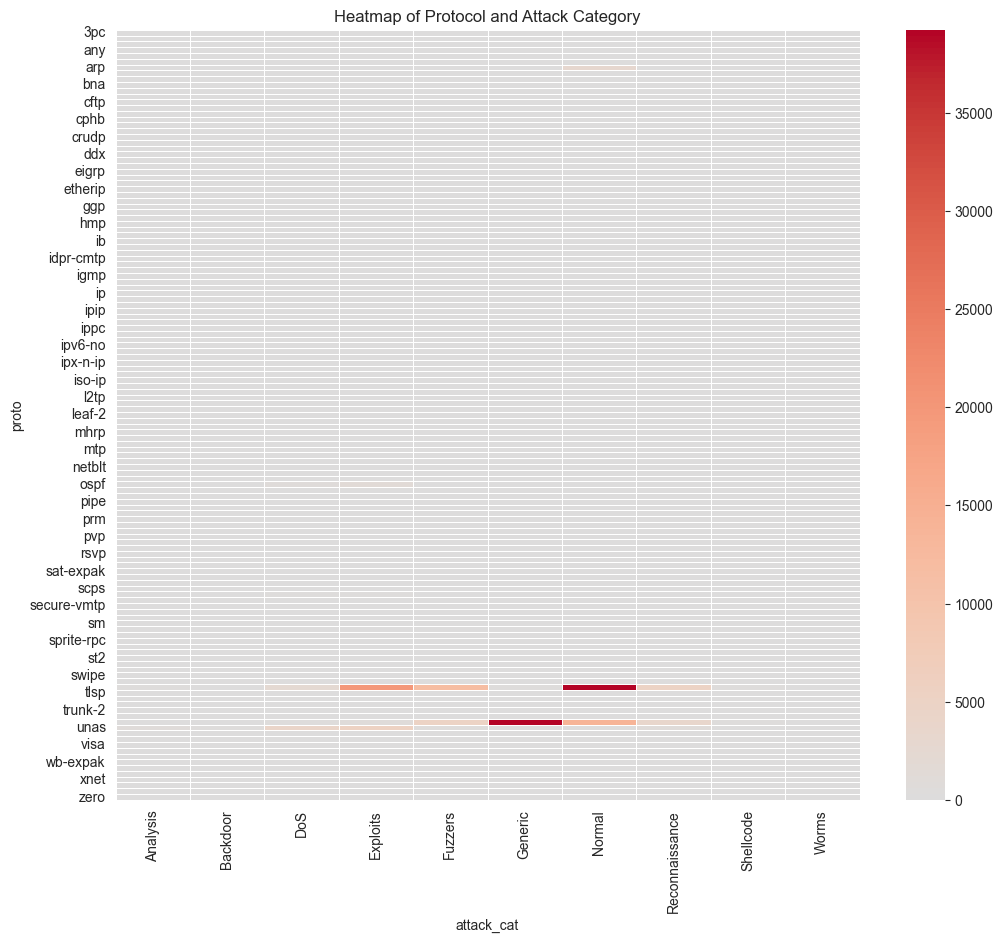

##### The most correlated protocol with attack category with values:

proto           3pc  a/n  aes-sp3-d  any  argus  aris   arp  ax.25  bbn-rcc  \
attack_cat                                                                    
Analysis          5    5          5   15      5     5     0      5        5   
Backdoor          5    5          5   15      4     5     0      5        4   
DoS              34   34         34  102     34    34     0     34       34   
Exploits         44   44         44  132     44    44     0     44       44   
Fuzzers           5    5          5   15      5     5     0      5        5   
Generic           1    1          1    3      0     1     0      1        0   
Normal            0    0          0    0      0     0  2859      0        0   
Reconnaissance    6    6          6   18      6     6     0      6        6   
Shellcode         0    0          0    0      0     0     0      0        0   
Worms             0    0          0    0      0     0     0      0        0   

proto           bna  ...  visa  vmtp  vrrp  wb-expa

##### Based on the visualization and the datas, the 10 most correlated pairs (attack_cat, proto) are:

proto  attack_cat    
udp    Generic           39229
tcp    Normal            39121
       Exploits          19689
udp    Normal            13922
tcp    Fuzzers           11761
unas   Exploits           5280
tcp    Reconnaissance     5100
udp    Fuzzers            4945
unas   DoS                4080
udp    Reconnaissance     3586
dtype: int64


In [55]:
pivot_table = df.groupby('proto')['attack_cat'].value_counts().unstack().fillna(0)
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=False, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")
plt.title("Heatmap of Protocol and Attack Category")
plt.show()

print_markdown("##### The most correlated protocol with attack category with values:")
cross_tab = pd.crosstab(df['attack_cat'], df['proto'])
print(cross_tab)

print_markdown("##### Based on the visualization and the datas, the 10 most correlated pairs (attack_cat, proto) are:")
print(cross_tab.unstack().sort_values(ascending=False).head(10))

#### 7. Your fourth question (replace this heading)

In [13]:
# Write your code here

#### 8. Your fifth question (replace this heading)

In [14]:
# Write your code here